## Importerer nødvendige biblitoker

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import skew
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Task 1:
## Indlæsning af data
Der indlæses data fra en csv fil.

In [4]:
# Ændrer visningen til at vise alle kolonner for at sikre, at der ikke er nogen, der overses, da datasættet har mange kolonner
pd.set_option('display.max_columns', None)

# Indlæser datasættet
data = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")

# Tjekker datasættets form (rækker, kolonner)
print("Shape of dataset:", data.shape)

# Får grundlæggende info om datasættet
data.info()

# Viser de første 5 rækker
print(data.head())

# Viser de sidste 5 rækker
print(data.tail())

# Viser en tilfældig prøve på 5 rækker
print(data.sample(5))

Shape of dataset: (1470, 35)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 


## Rensning af data
For at forberede dataene til analyse og modellering, skal vi identificere og rydde op i problemer som 
manglende værdier, duplikater, og fejlagtige eller irrelevante data.

In [6]:
# Tjekker for manglende værdier
print("Manglende værdier i hvert column:")
print(data.isnull().sum())  

# Tjekker for NaN-værdier
print("Manglende NaN-værdier i hvert column:")
print(data.isna().sum())  

# Tjekker for duplikater
print(f"Antal duplikatrækker: {data.duplicated().sum()}")  

Manglende værdier i hvert column:
Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsI

Der er ingen manglende eller NaN-værdier i datasættet, hvilket gør dataene klare til videre analyse. Der er heller ingen duplikatrækker, så datasættet er unikt, og der er ikke behov for at fjerne duplikater.

## Udforskning af data
Når dataene er renset, kan der udforskes ved hjælp af deskriptiv statistik og visualiseringer. Dette trin hjælper med at forstå mønstre og relationer mellem funktionerne, især dem, der er relevante.

In [9]:
# Deskriptiv statistik for numeriske kolonner
print("Beskrivende statistik:")
print(data.describe())

Beskrivende statistik:
               Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
count  1470.000000  1470.000000       1470.000000  1470.000000         1470.0   
mean     36.923810   802.485714          9.192517     2.912925            1.0   
std       9.135373   403.509100          8.106864     1.024165            0.0   
min      18.000000   102.000000          1.000000     1.000000            1.0   
25%      30.000000   465.000000          2.000000     2.000000            1.0   
50%      36.000000   802.000000          7.000000     3.000000            1.0   
75%      43.000000  1157.000000         14.000000     4.000000            1.0   
max      60.000000  1499.000000         29.000000     5.000000            1.0   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     1470.000000              1470.000000  1470.000000     1470.000000   
mean      1024.865306                 2.721769    65.891156        2.729932   
std       

Den deskriptive statistik giver et hurtigt overblik over de numeriske kolonner, såsom gennemsnit, standardafvigelse, min og max værdi.

Tjekker for outliers ved at plotte histogrammer for hver kolonne

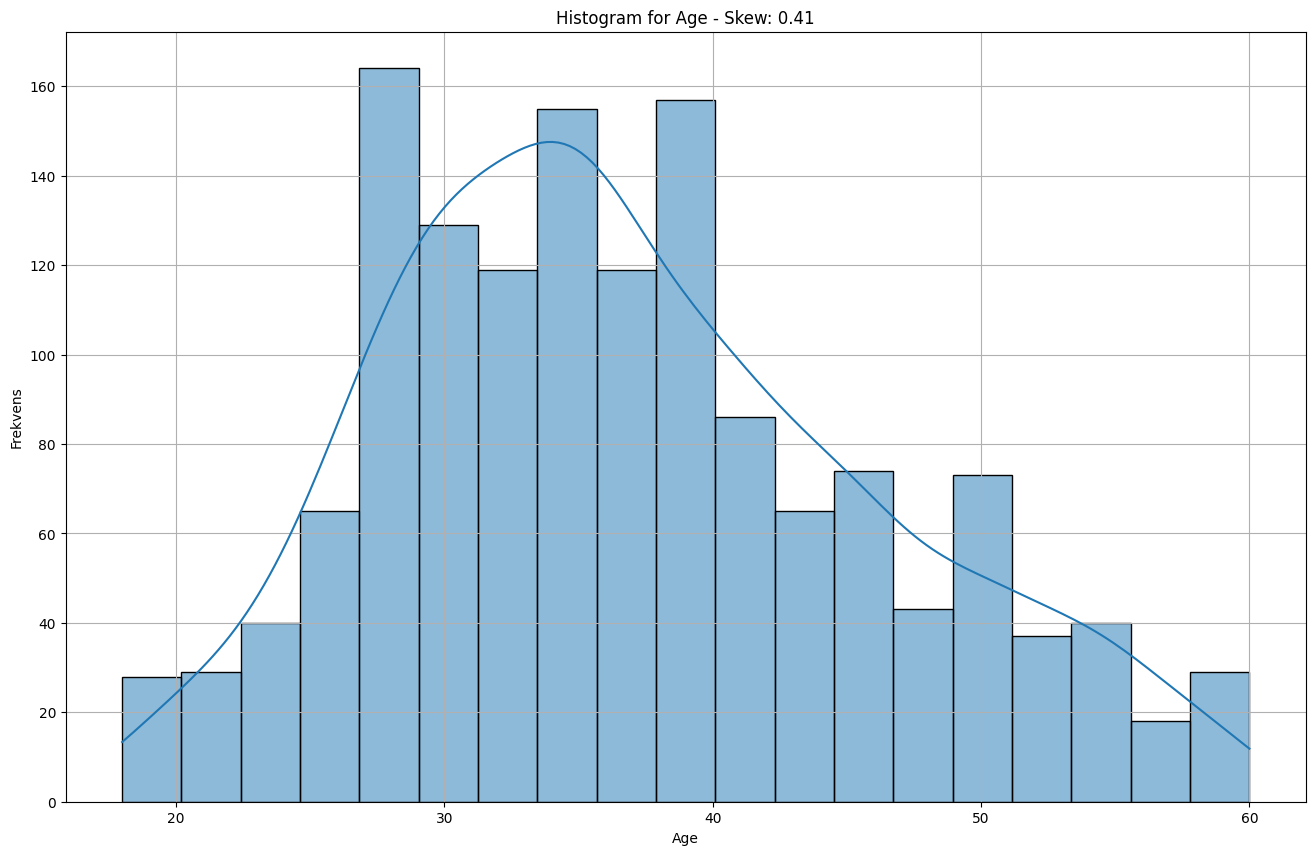

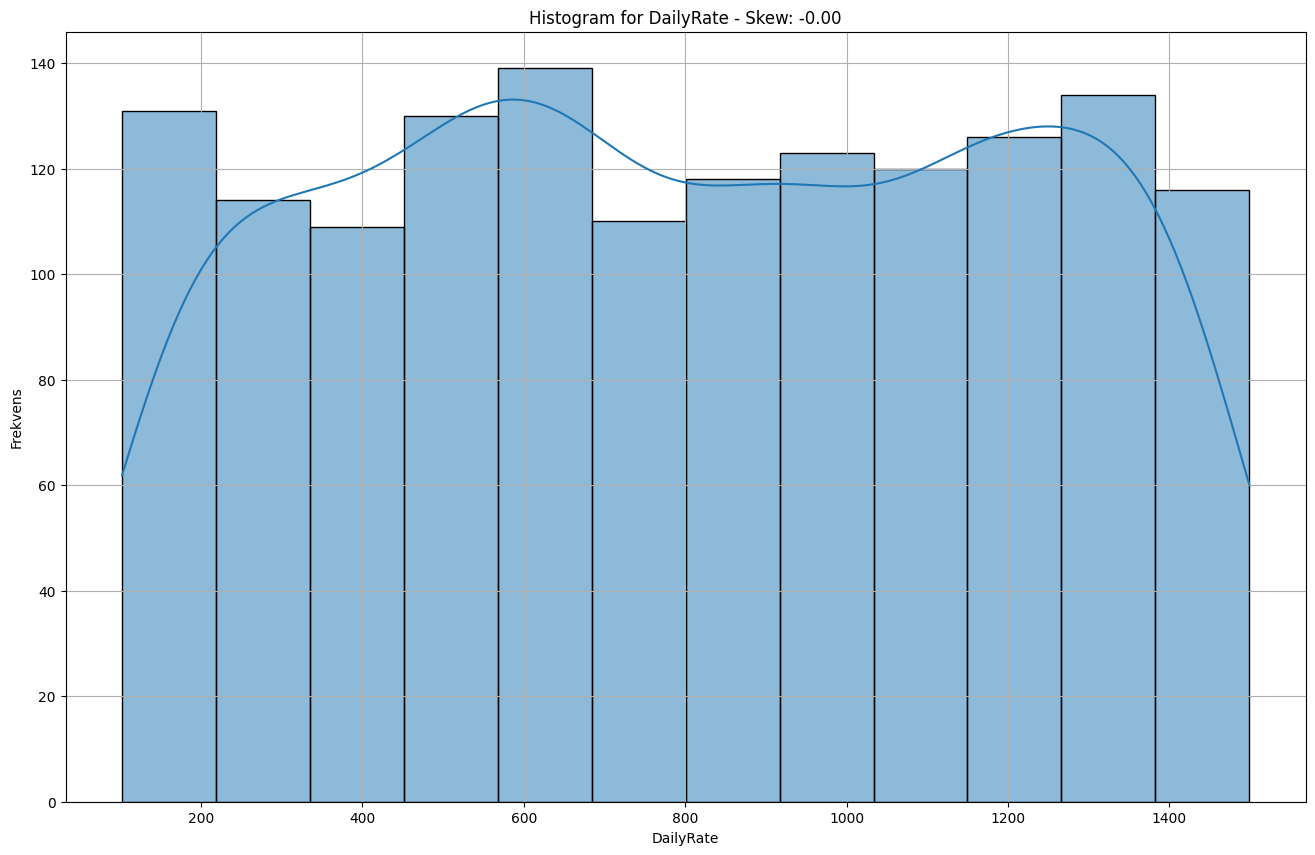

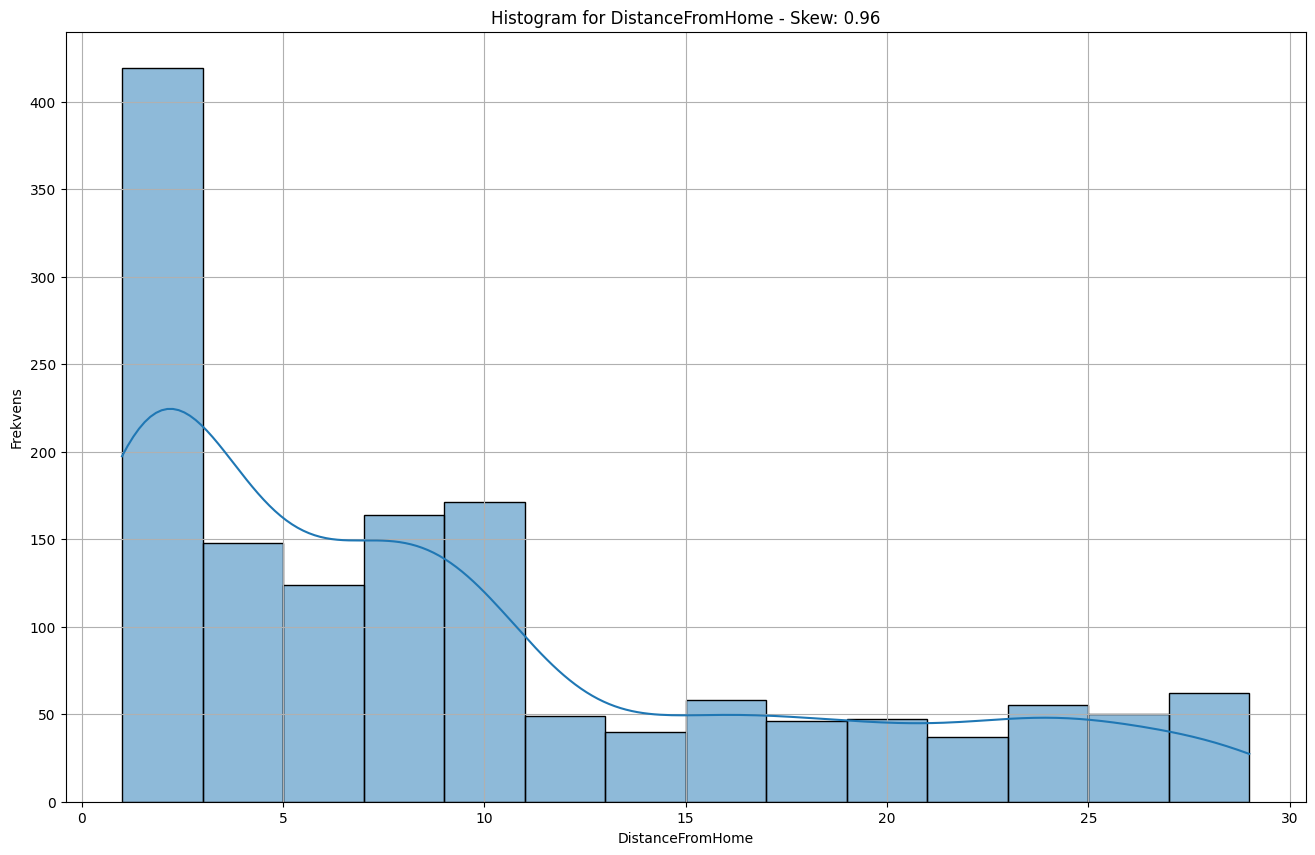

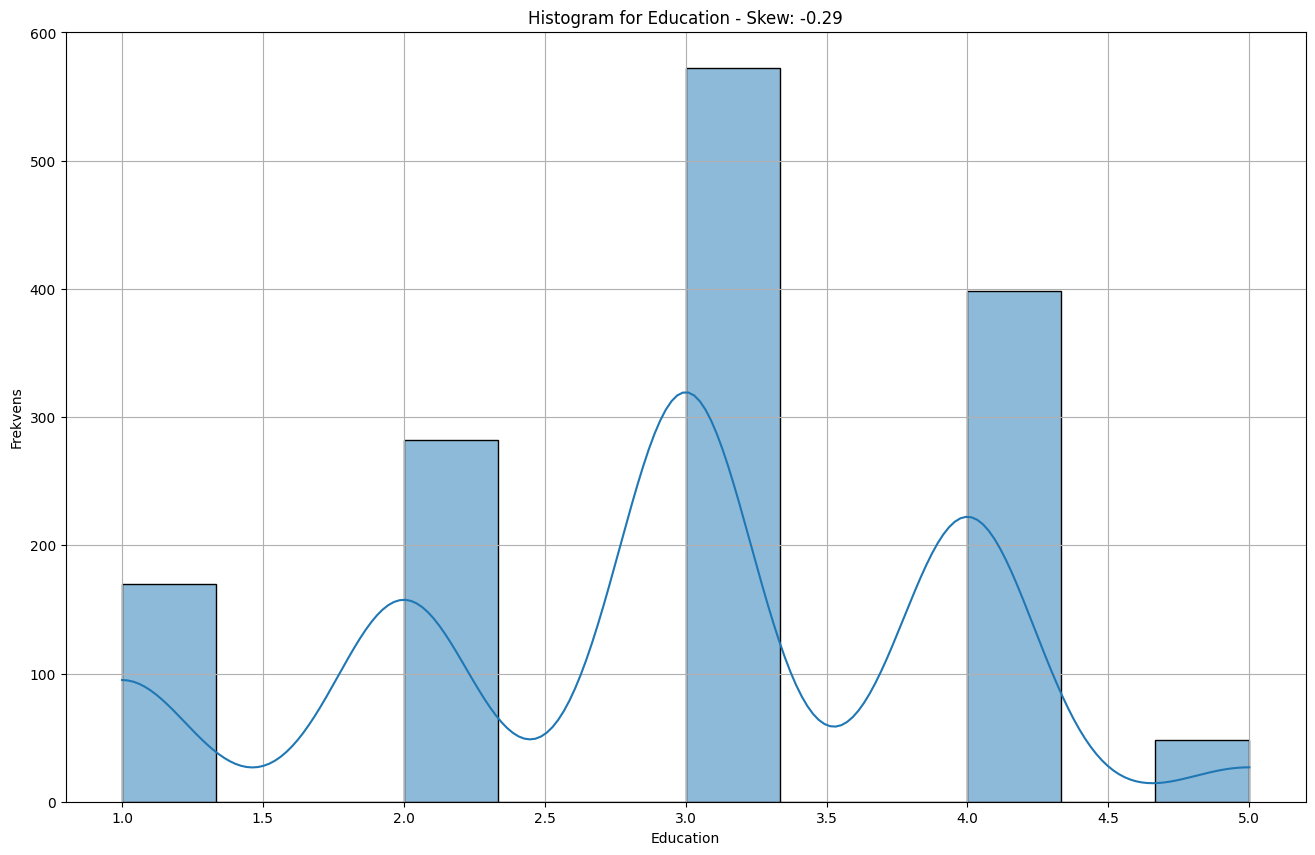

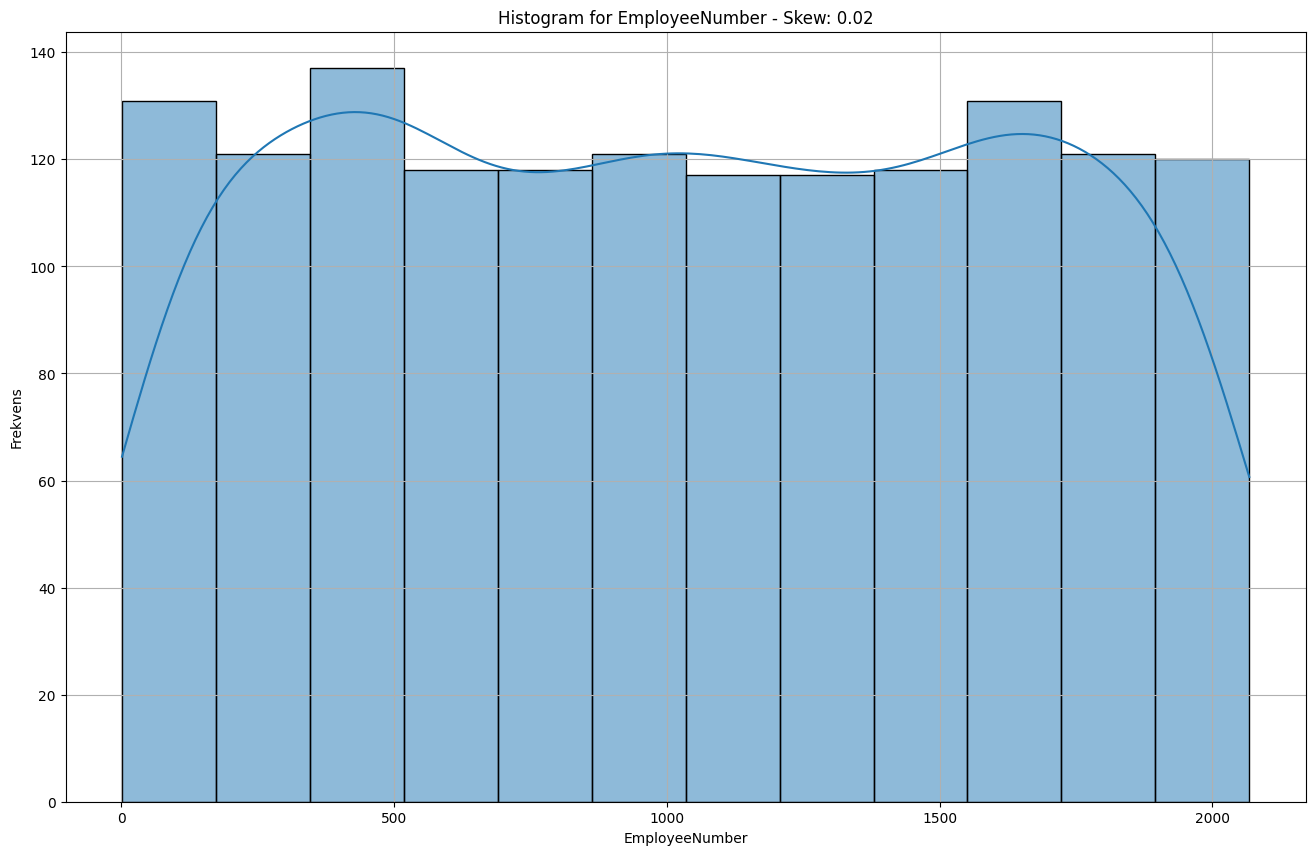

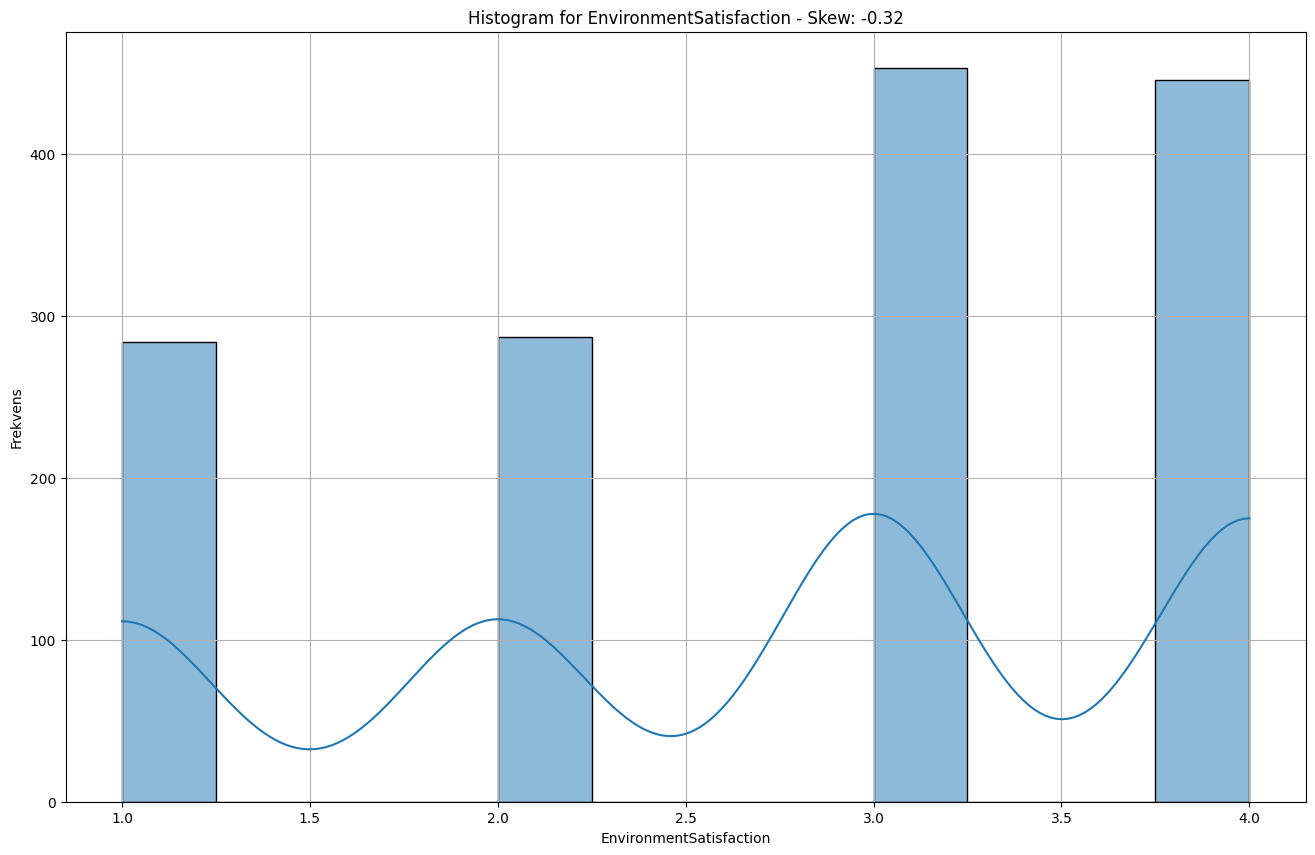

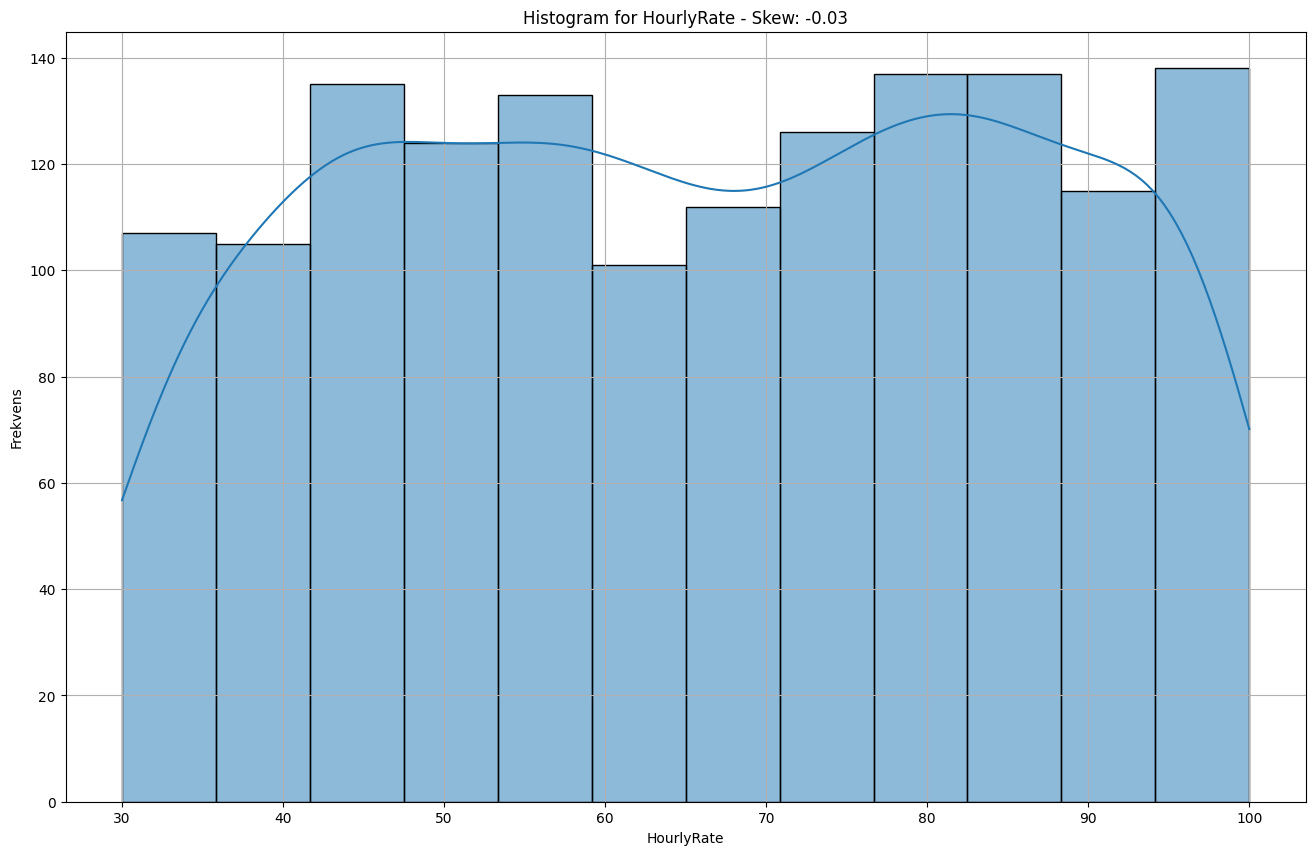

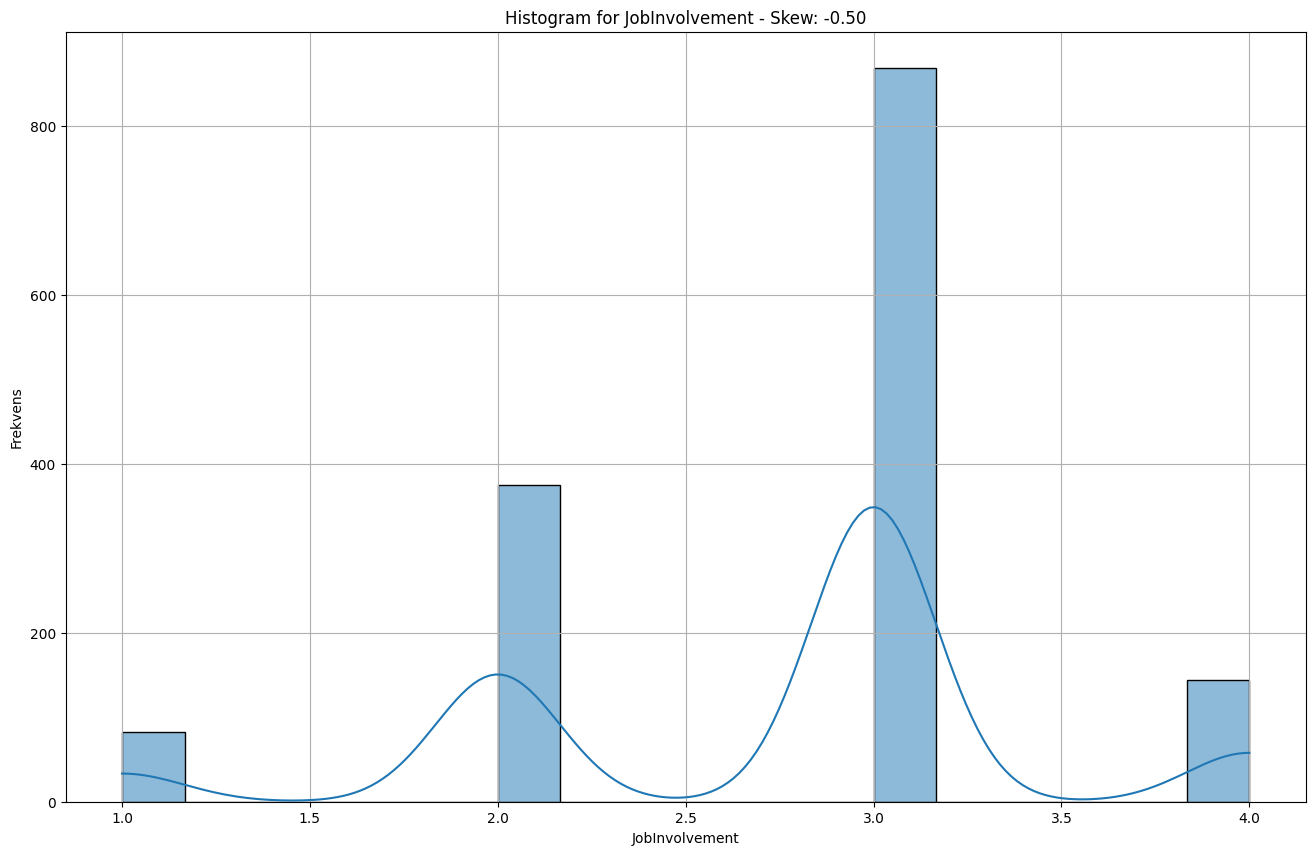

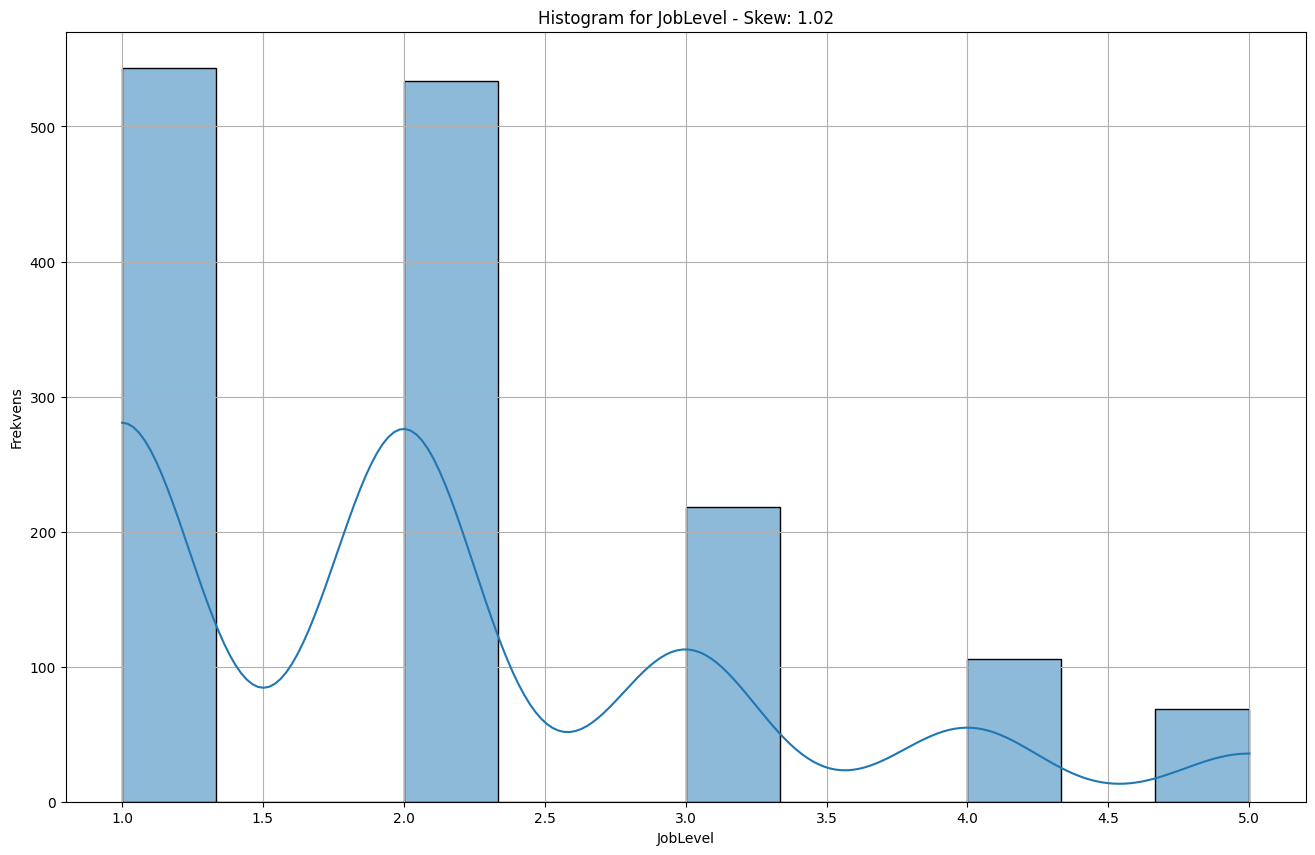

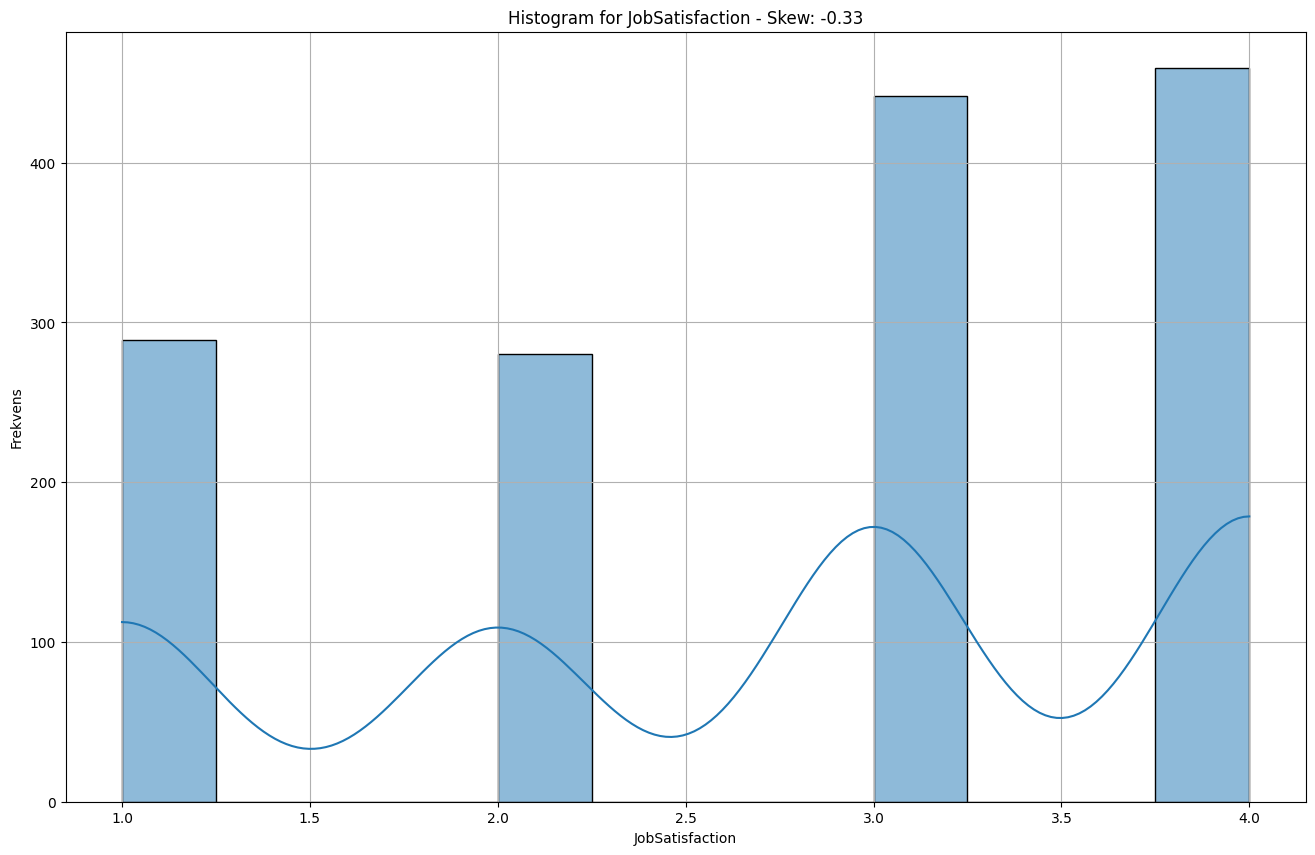

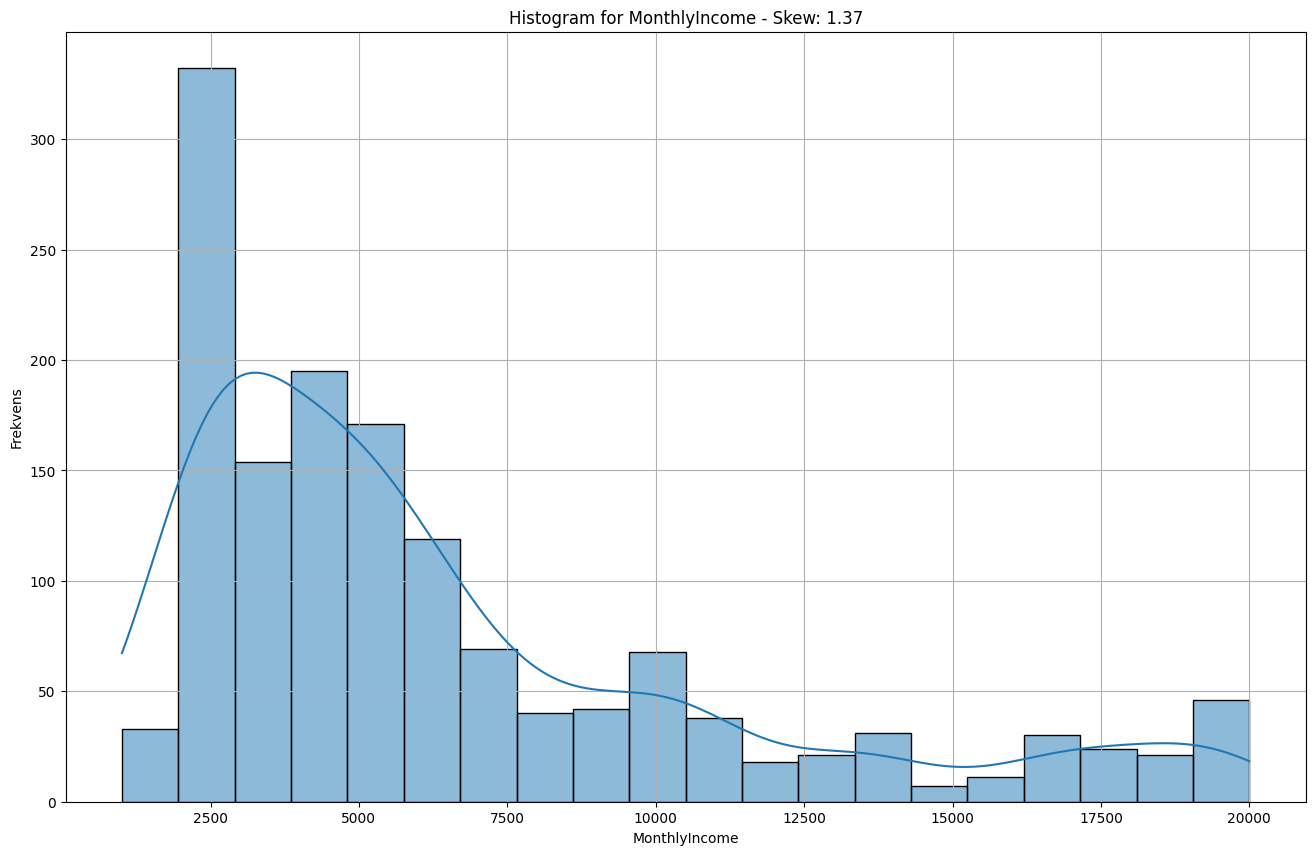

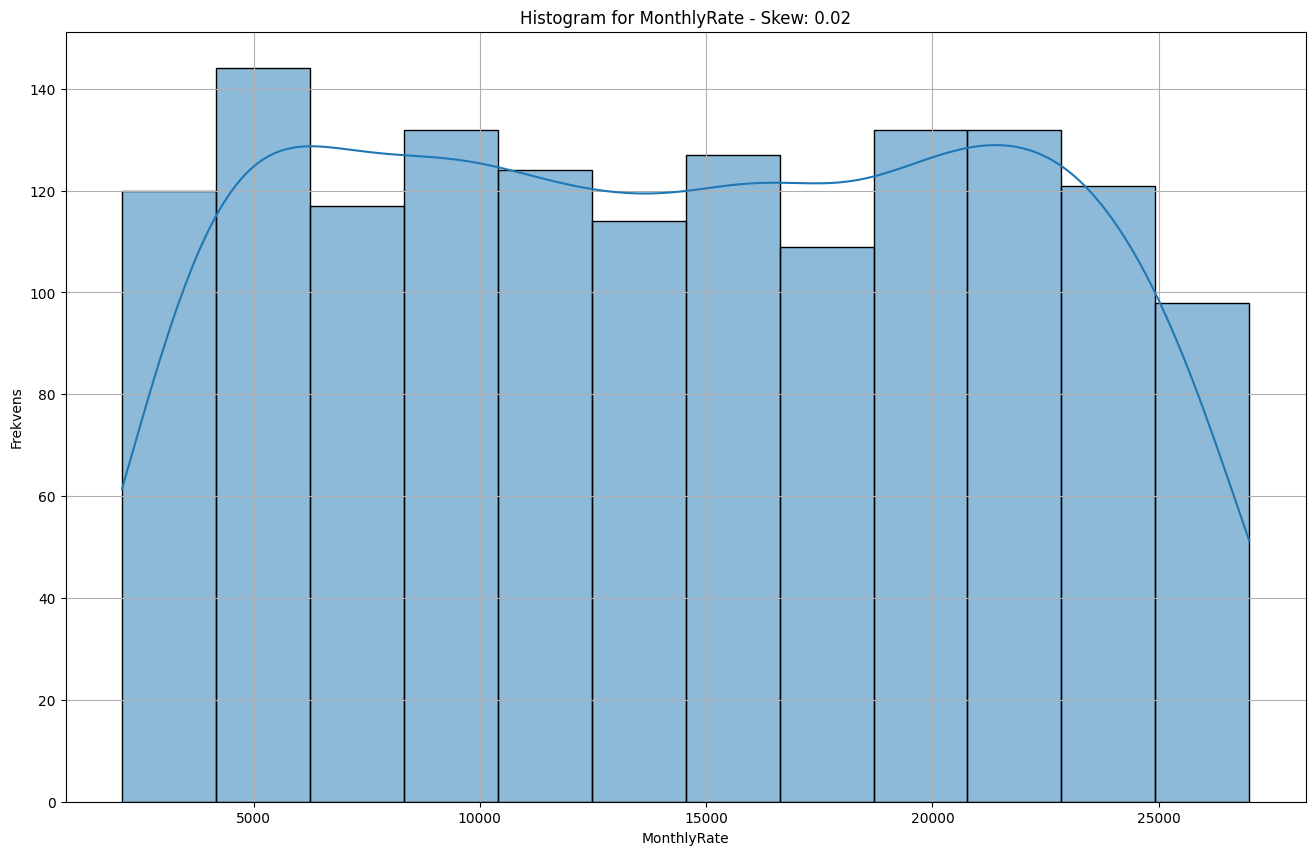

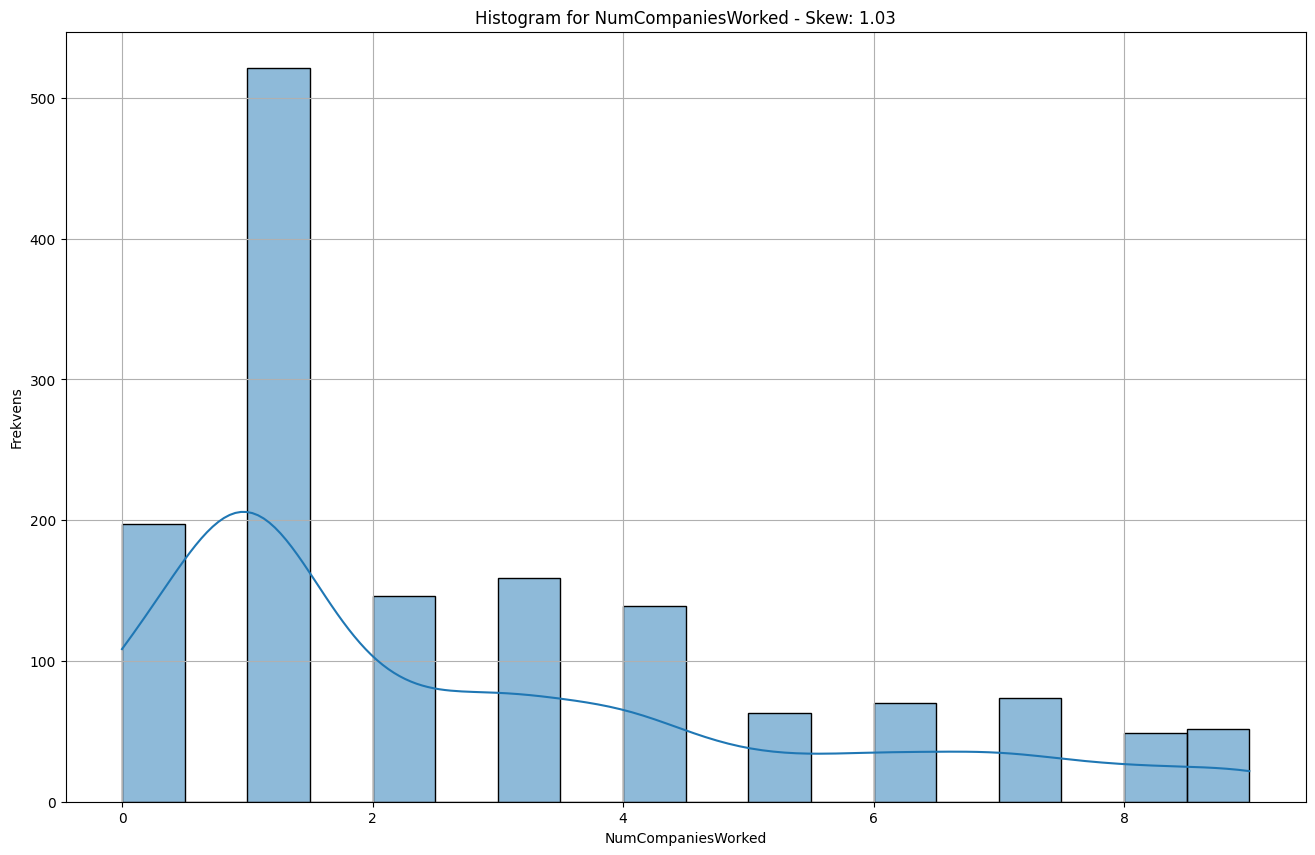

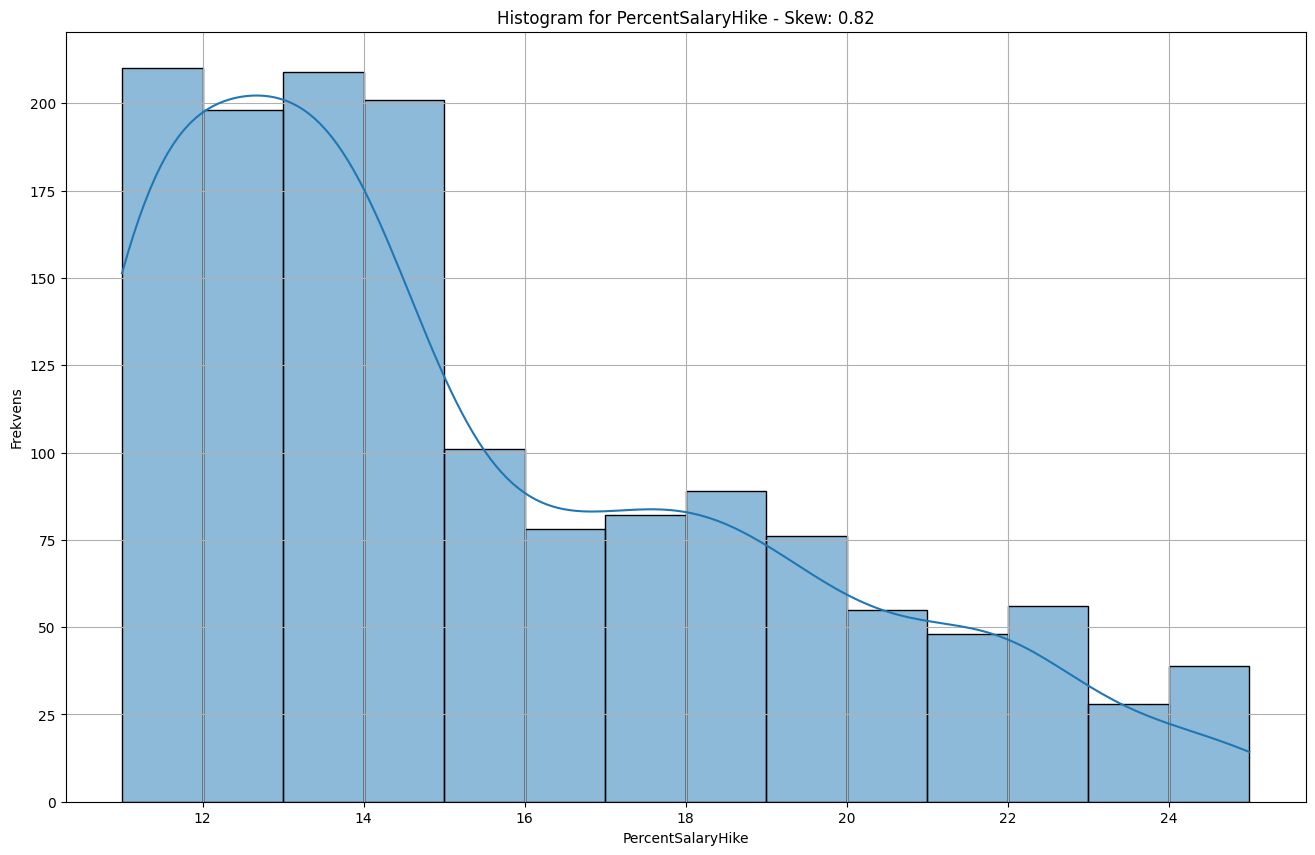

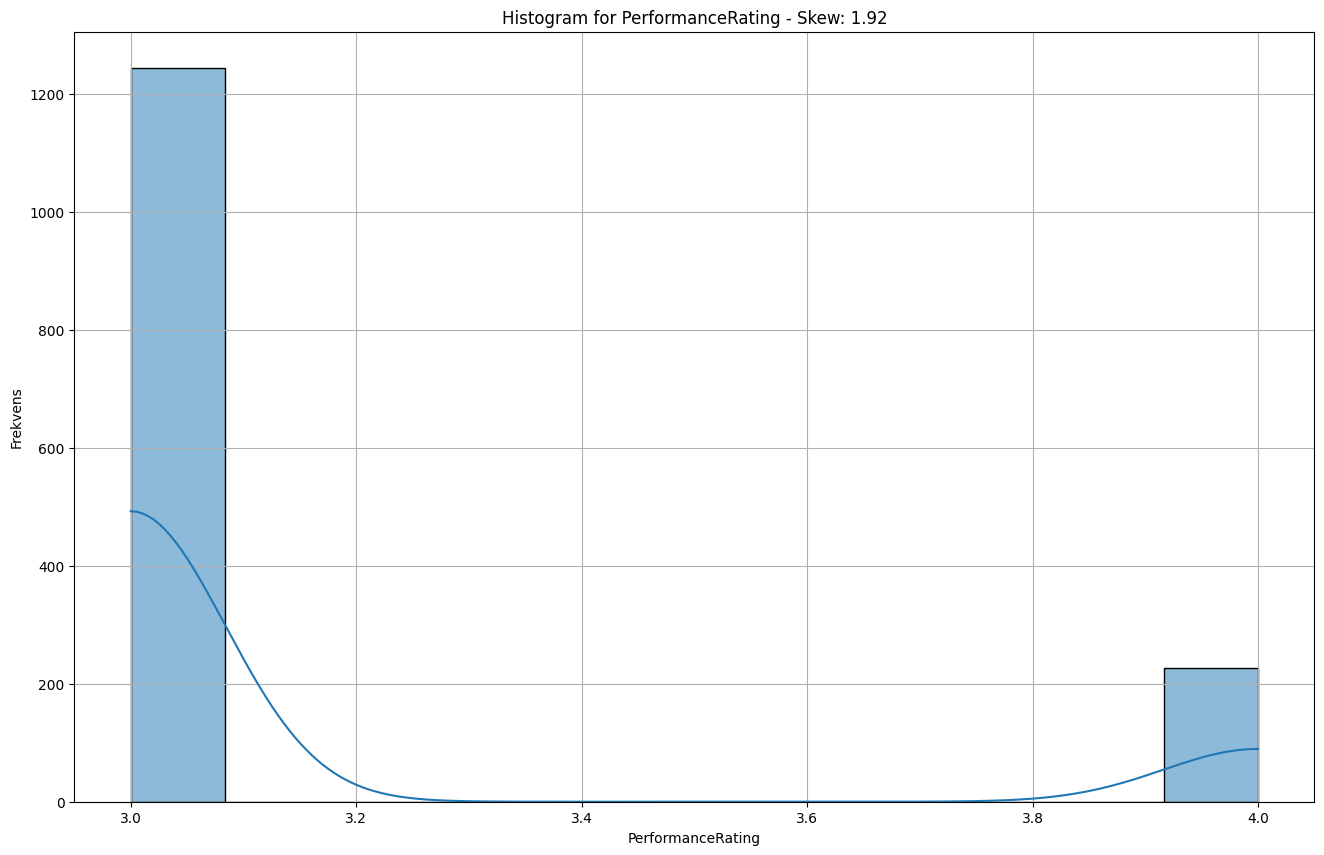

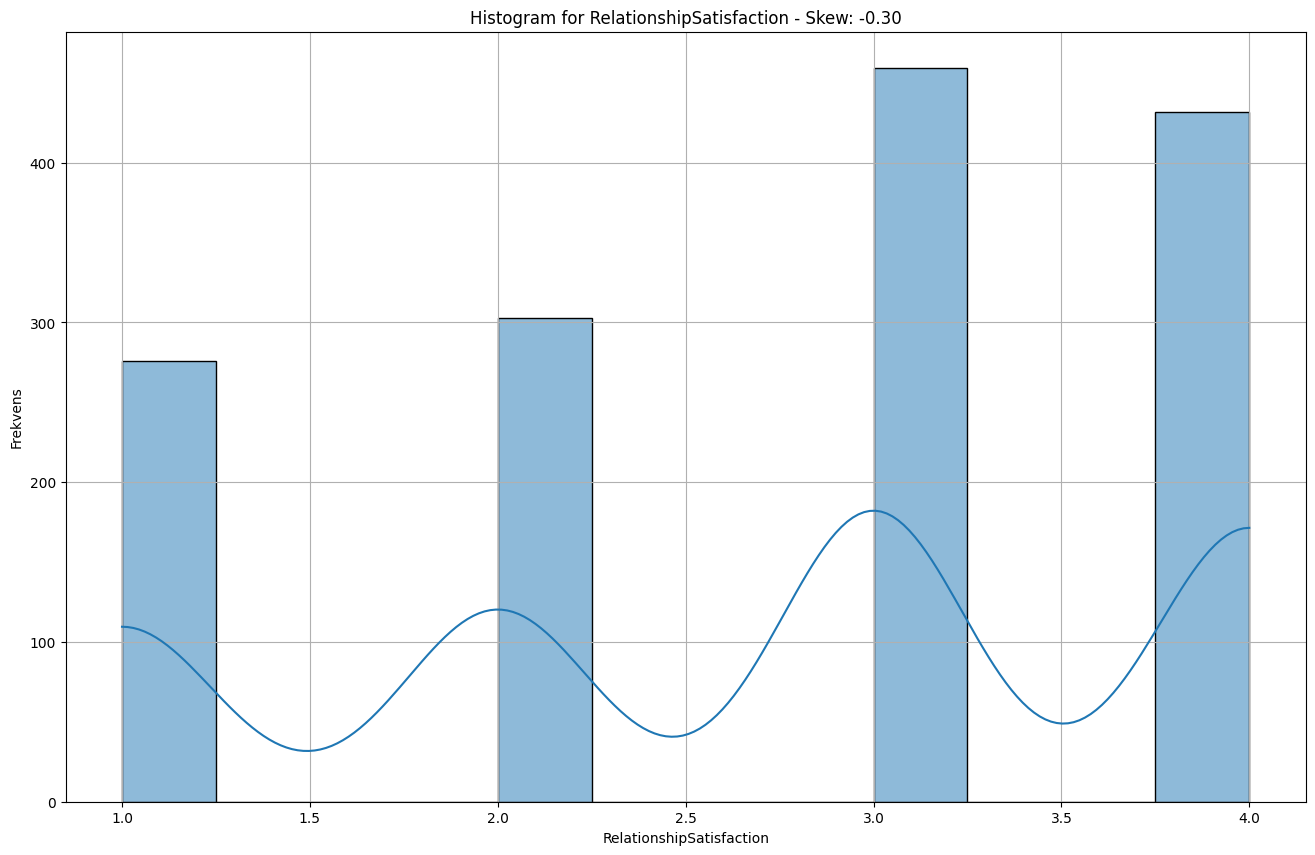

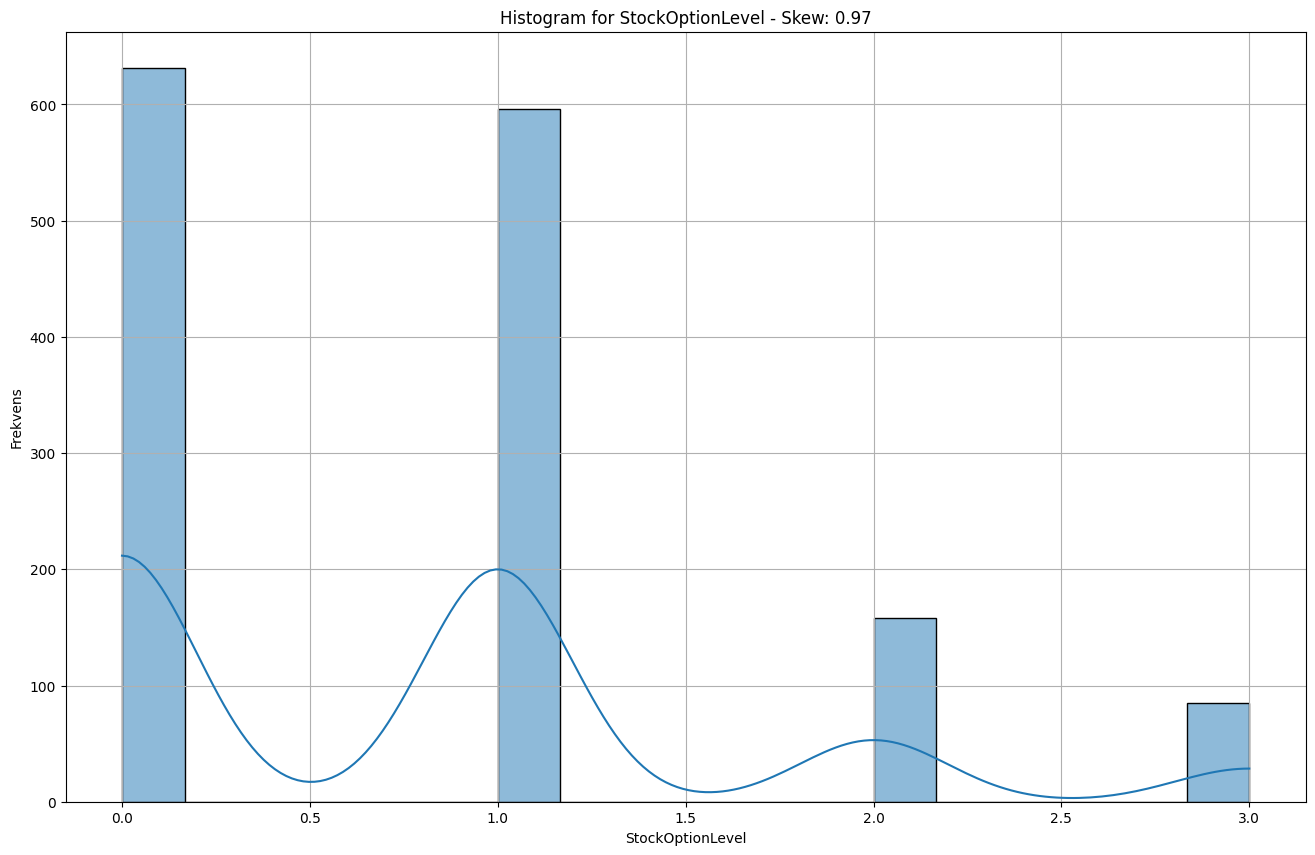

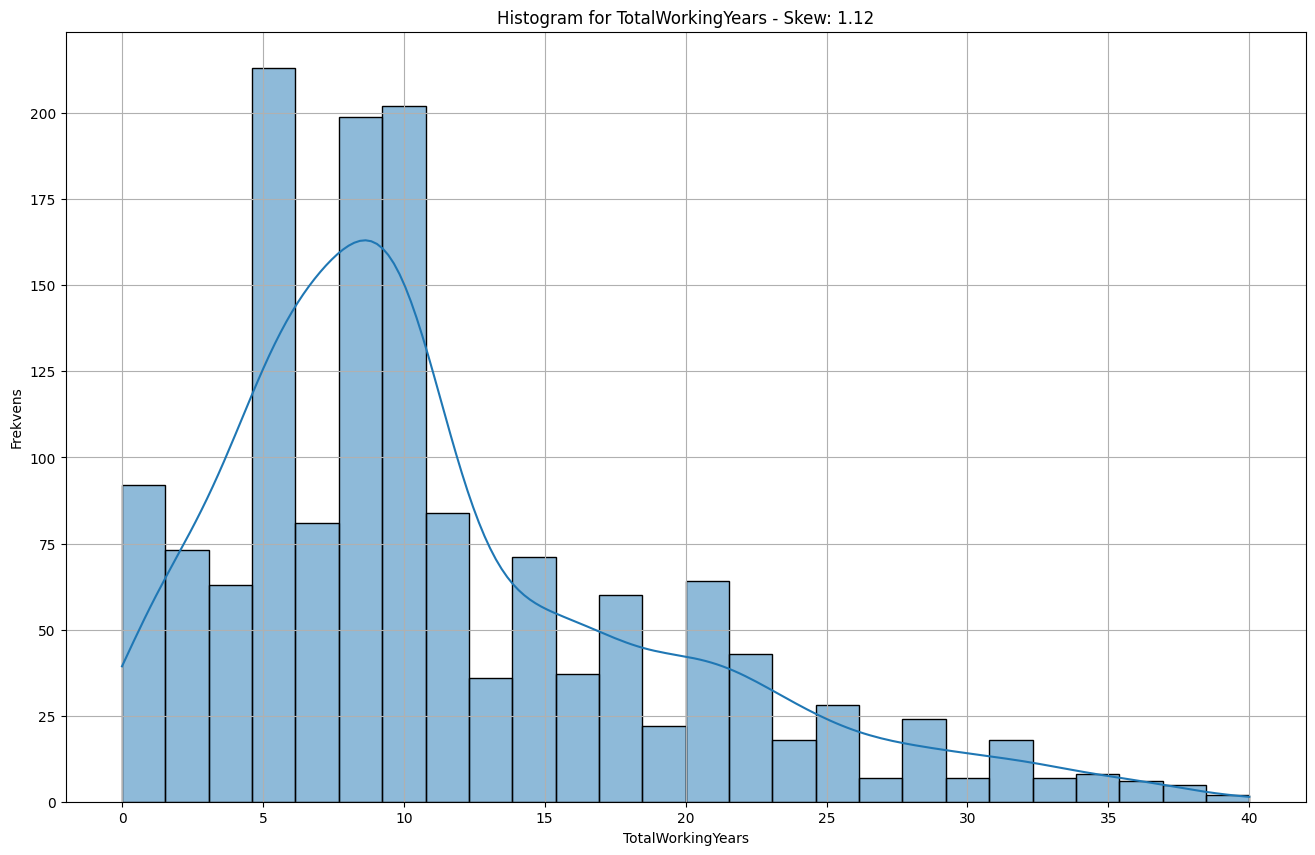

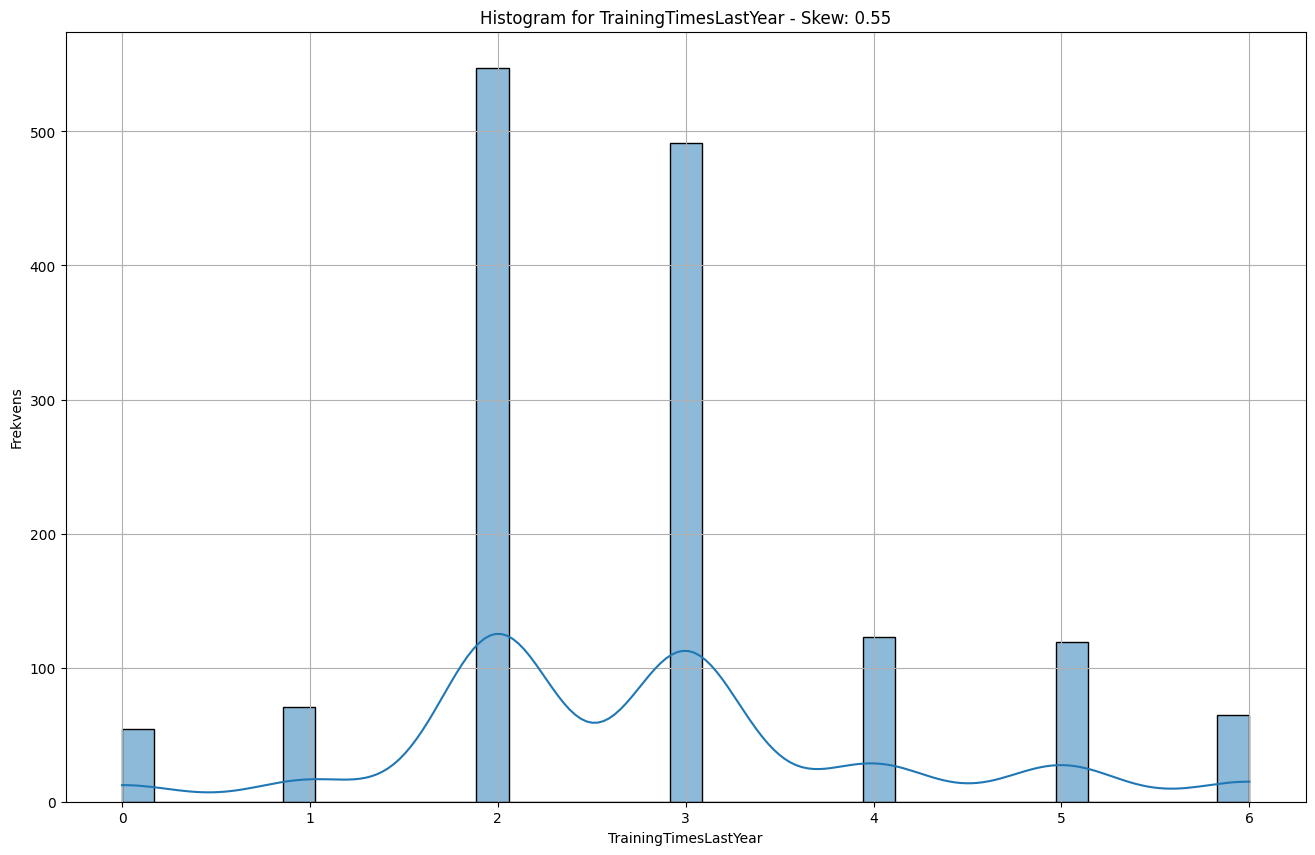

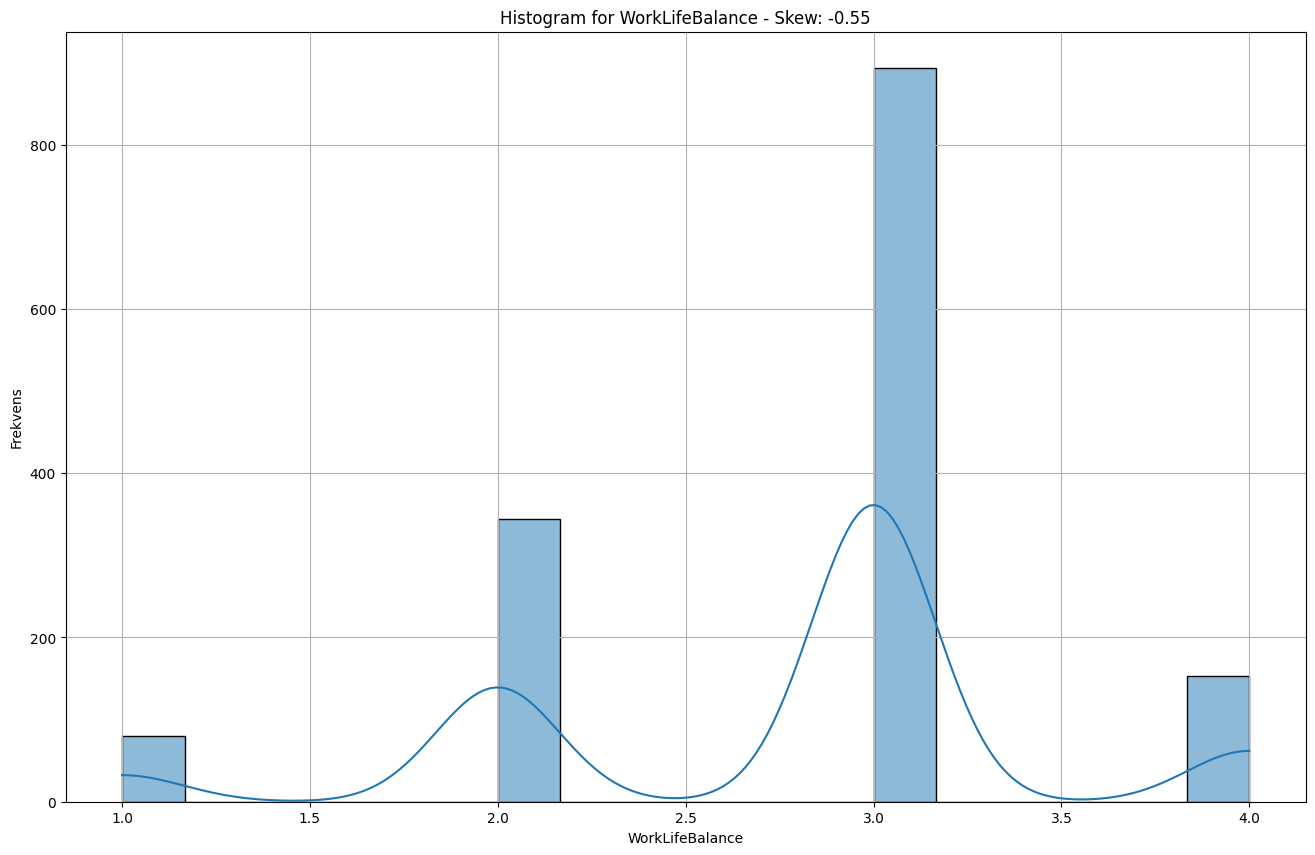

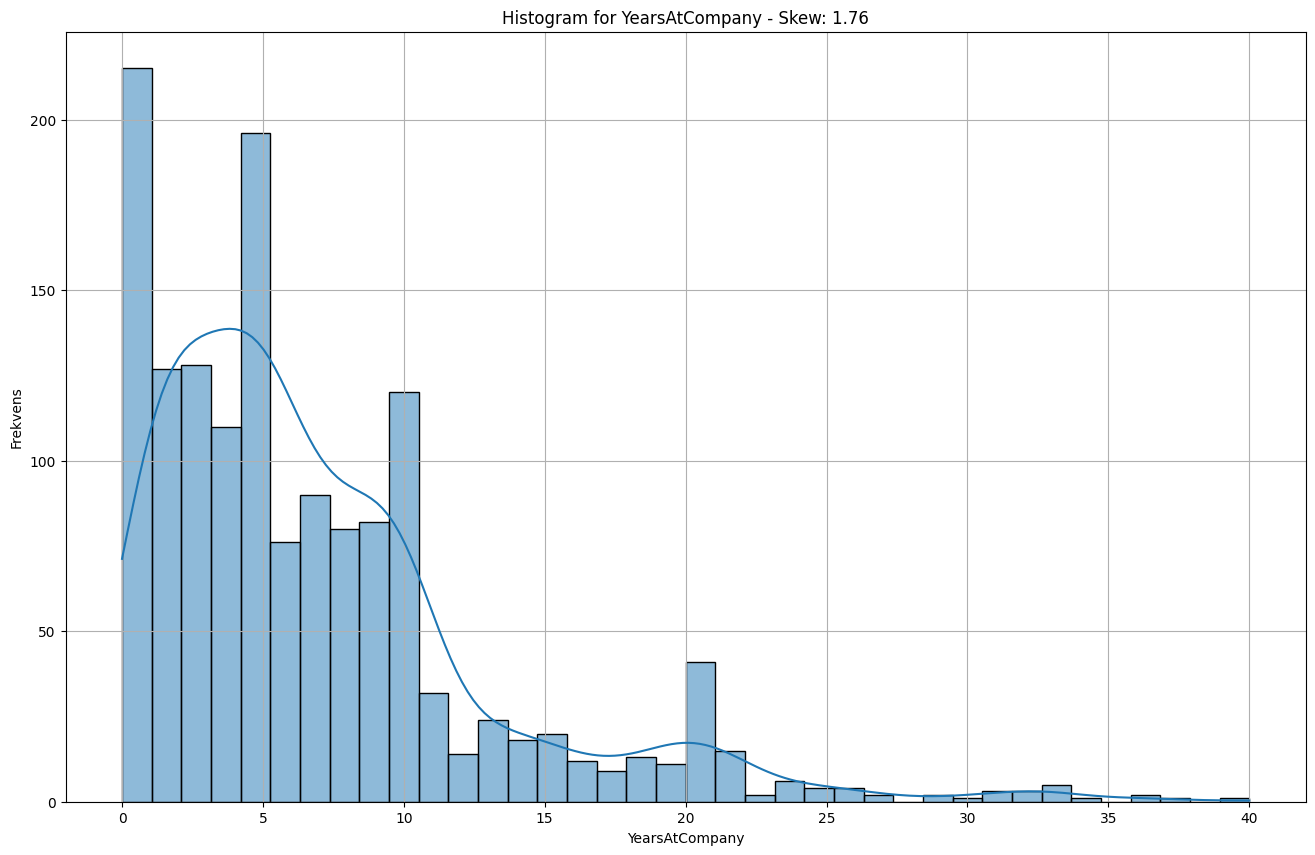

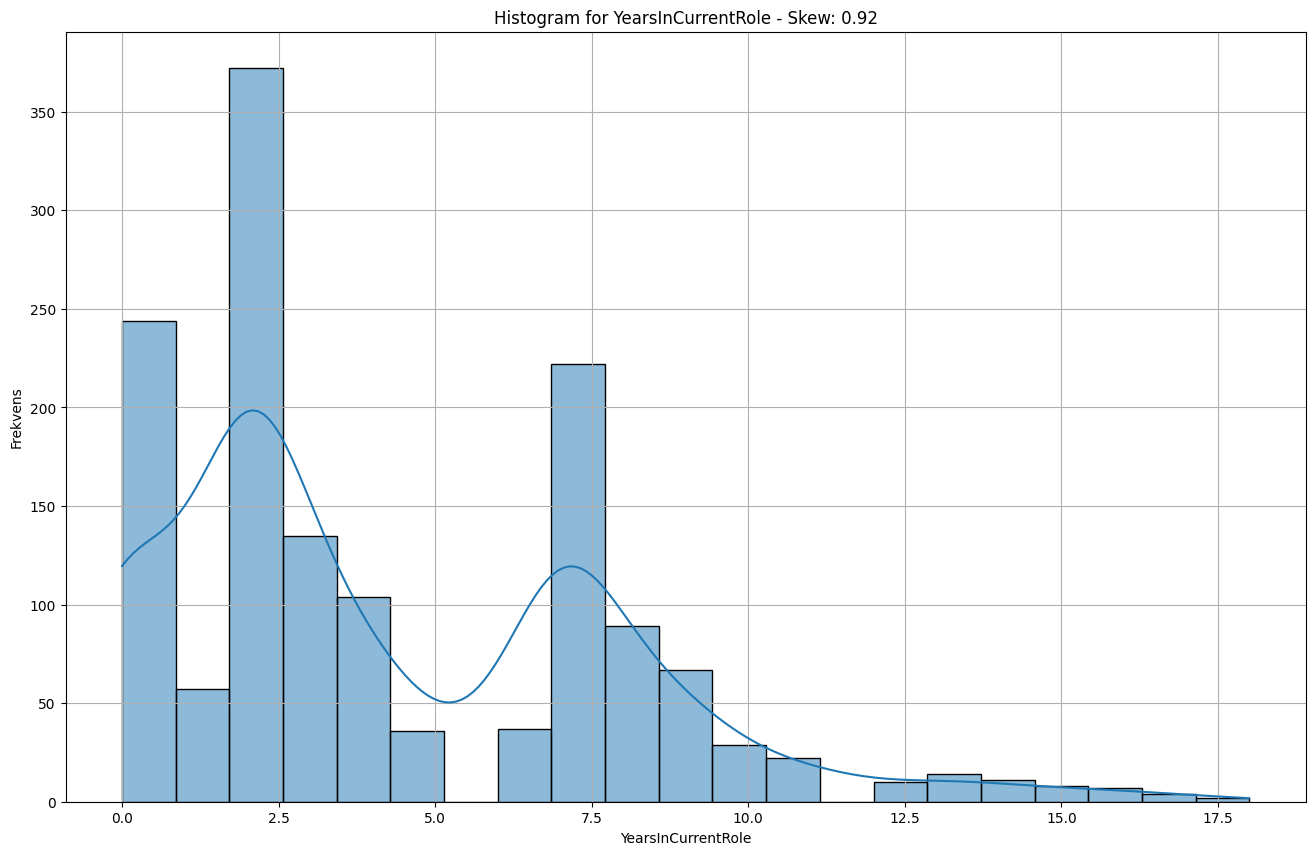

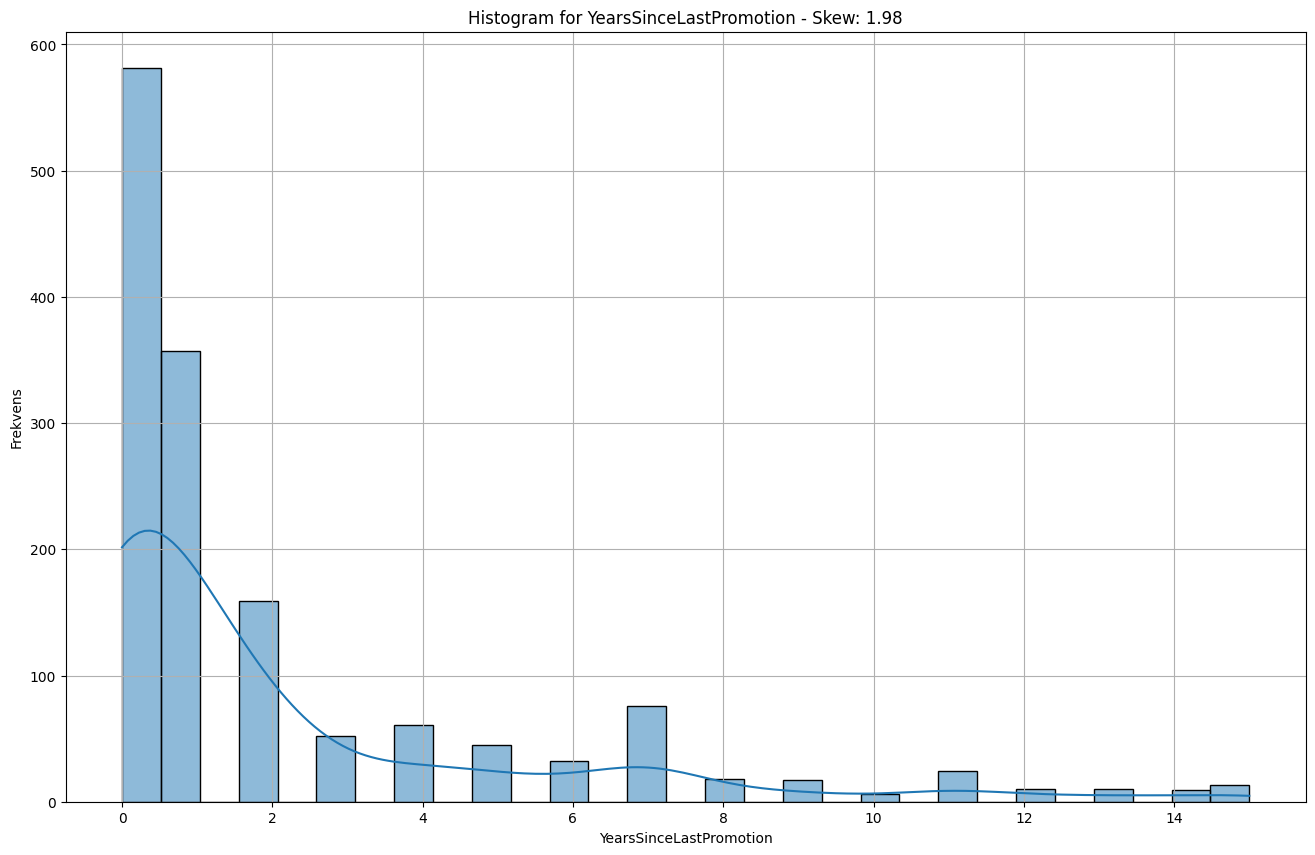

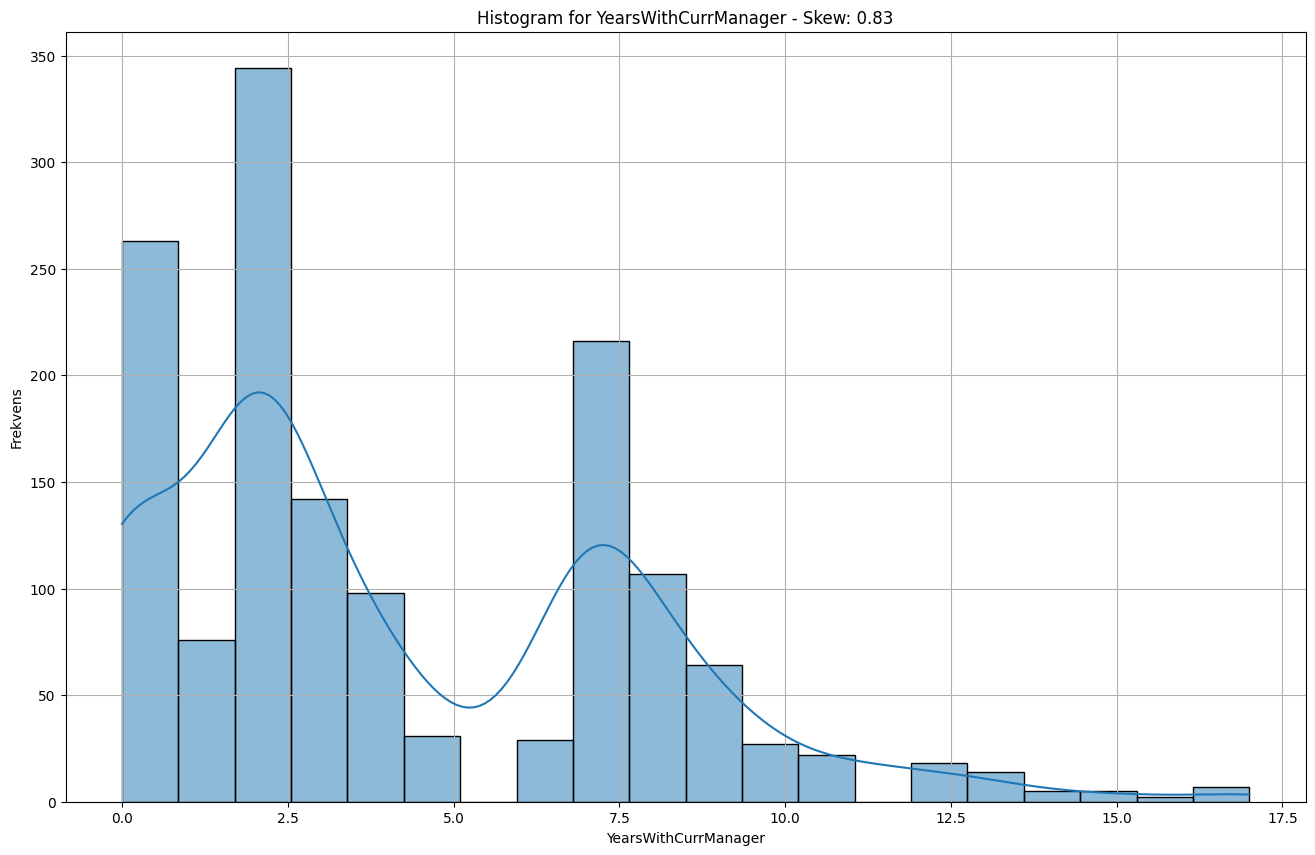

Skævhed for numeriske kolonner:
Age                         0.412864
DailyRate                  -0.003515
DistanceFromHome            0.957140
Education                  -0.289385
EmployeeNumber              0.016557
EnvironmentSatisfaction    -0.321326
HourlyRate                 -0.032278
JobInvolvement             -0.497911
JobLevel                    1.024355
JobSatisfaction            -0.329335
MonthlyIncome               1.368419
MonthlyRate                 0.018559
NumCompaniesWorked          1.025423
PercentSalaryHike           0.820290
PerformanceRating           1.919921
RelationshipSatisfaction   -0.302518
StockOptionLevel            0.967991
TotalWorkingYears           1.116032
TrainingTimesLastYear       0.552560
WorkLifeBalance            -0.551916
YearsAtCompany              1.762728
YearsInCurrentRole          0.916427
YearsSinceLastPromotion     1.982265
YearsWithCurrManager        0.832600
dtype: float64


In [12]:
# Vælger kun numeriske kolonner
numerical_data = data.select_dtypes(include=['float64', 'int64'])

# Filtrerer kolonner med lav variation (for at undgå skævhed på næsten konstante kolonner)
numerical_data = numerical_data.loc[:, numerical_data.nunique() > 1]

# Beregner skewness for hver numerisk kolonne
skew_values = numerical_data.apply(skew)

# Plotter histogrammer for de numeriske kolonner
for col in numerical_data.columns:
    plt.figure(figsize=(16, 10))  
    sns.histplot(numerical_data[col], kde=True)  
    plt.title(f'Histogram for {col} - Skew: {skew_values[col]:.2f}')
    plt.xlabel(col)
    plt.ylabel('Frekvens')
    plt.grid(True)
    plt.show()

# Udskriver skævheden for hver numerisk kolonne
print("Skævhed for numeriske kolonner:")
print(skew_values)

## Log-Transformation af Kolonner med Høj Skævhed

In [14]:
# Anvender log-transformation for kolonner med høj skævhed
data['MonthlyIncome'] = np.log1p(data['MonthlyIncome'])  # Log-transformation
data['JobLevel'] = np.log1p(data['JobLevel'])
data['NumCompaniesWorked'] = np.log1p(data['NumCompaniesWorked'])
data['TotalWorkingYears'] = np.log1p(data['TotalWorkingYears'])
data['YearsAtCompany'] = np.log1p(data['YearsAtCompany'])
data['YearsInCurrentRole'] = np.log1p(data['YearsInCurrentRole'])
data['YearsSinceLastPromotion'] = np.log1p(data['YearsSinceLastPromotion'])
data['YearsWithCurrManager'] = np.log1p(data['YearsWithCurrManager'])
data['PerformanceRating'] = np.log1p(data['PerformanceRating'])  
data['StockOptionLevel'] = np.log1p(data['StockOptionLevel'])  
data['PercentSalaryHike'] = np.log1p(data['PercentSalaryHike']) 

For at forbedre dataenes normalfordeling og gøre dem mere egnede til lineær regression, er log-transformation anvendt på de kolonner, der har høj skævhed. Skævhed kan forvrænge relationerne mellem variabler og reducere modellens præstation, så en log-transformation hjælper med at gøre dataene mere lineært fordelte.

## Beregning af Skævhed Efter Transformation

In [17]:
# Vælger kun numeriske kolonner
numerical_data = data.select_dtypes(include=['float64', 'int64'])

# Filtrerer kolonner med lav variation (for at undgå skævhed på næsten konstante kolonner)
numerical_data = numerical_data.loc[:, numerical_data.nunique() > 1]

# Beregner skævheden for hver numerisk kolonne
skew_values_after = numerical_data.apply(skew)

# Udskriver skævheden efter transformation
print("Skævhed efter transformation:")
print(skew_values_after)

Skævhed efter transformation:
Age                         0.412864
DailyRate                  -0.003515
DistanceFromHome            0.957140
Education                  -0.289385
EmployeeNumber              0.016557
EnvironmentSatisfaction    -0.321326
HourlyRate                 -0.032278
JobInvolvement             -0.497911
JobLevel                    0.447676
JobSatisfaction            -0.329335
MonthlyIncome               0.286156
MonthlyRate                 0.018559
NumCompaniesWorked          0.092801
PercentSalaryHike           0.513018
PerformanceRating           1.919921
RelationshipSatisfaction   -0.302518
StockOptionLevel            0.271685
TotalWorkingYears          -0.621540
TrainingTimesLastYear       0.552560
WorkLifeBalance            -0.551916
YearsAtCompany             -0.207496
YearsInCurrentRole         -0.383106
YearsSinceLastPromotion     0.718071
YearsWithCurrManager       -0.357321
dtype: float64


For at analysere fordelingen af de numeriske kolonner blev både skævheden beregnet og histogrammer anvendt. Dette gav indsigt i, hvilke kolonner der havde høj skævhed og potentielle outliers. Skævhed kan skabe problemer for modeller som lineær regression, der antager normalfordeling.

Derfor blev log-transformationer anvendt på de mest skæve kolonner. Efterfølgende beregninger viser, at transformationerne reducerede skævheden i flere tilfælde.

Dette er de transformerede histogrammer:

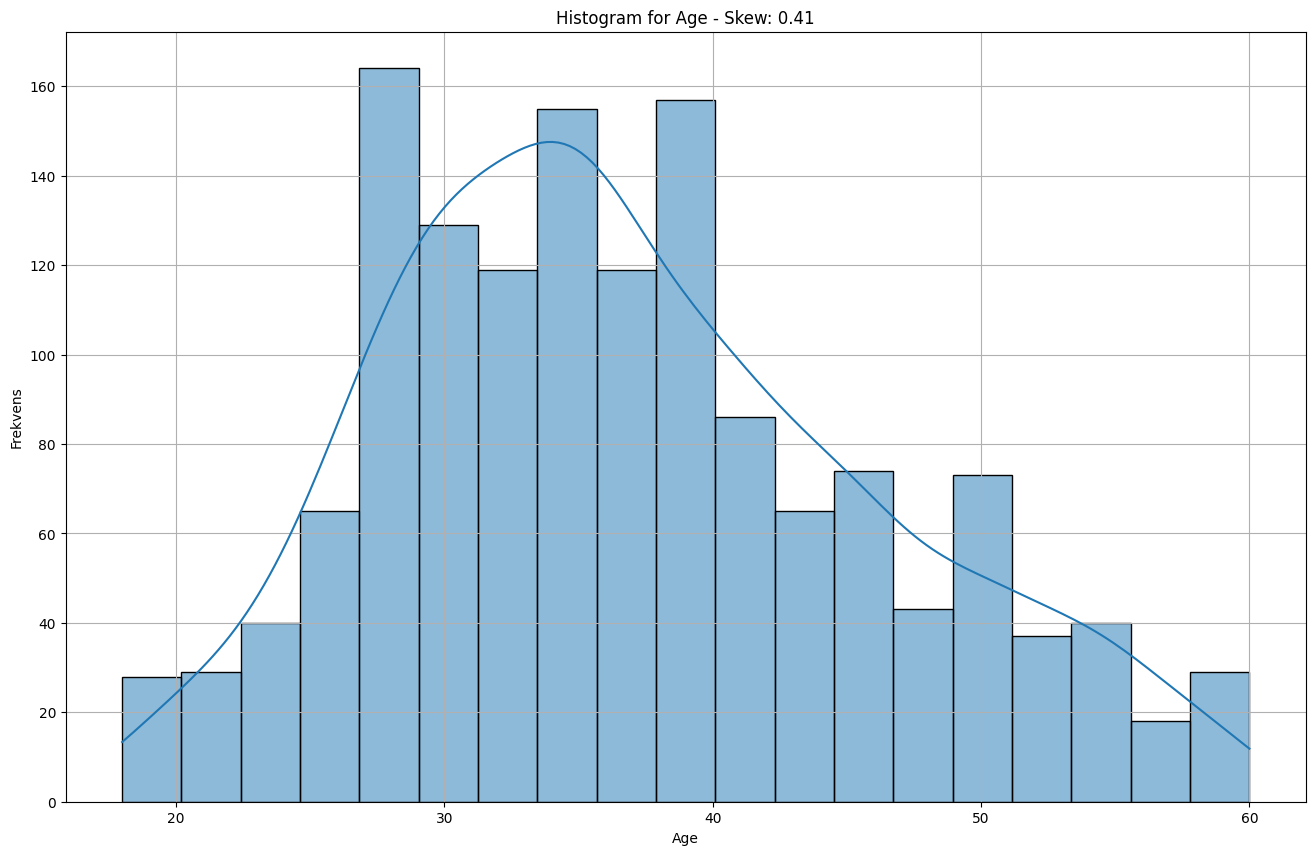

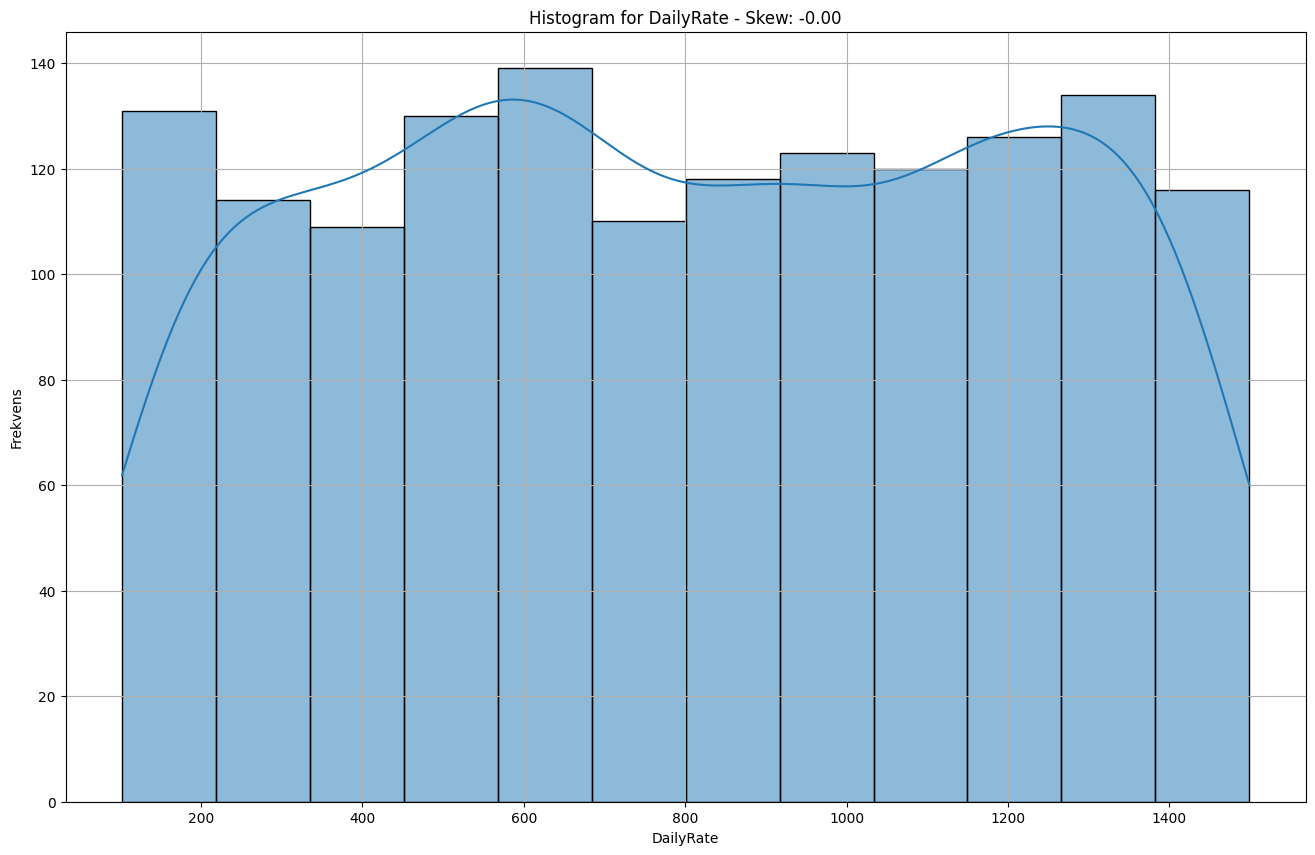

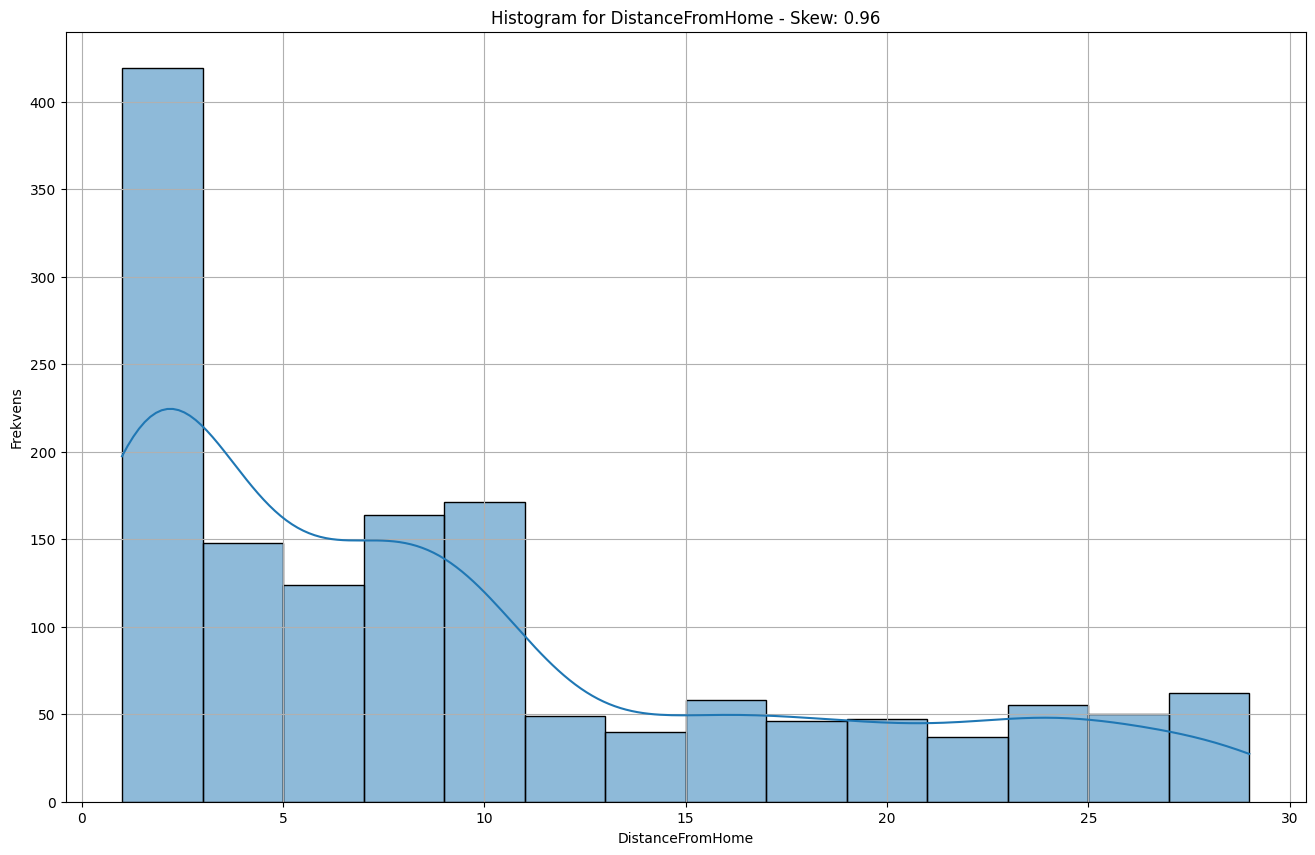

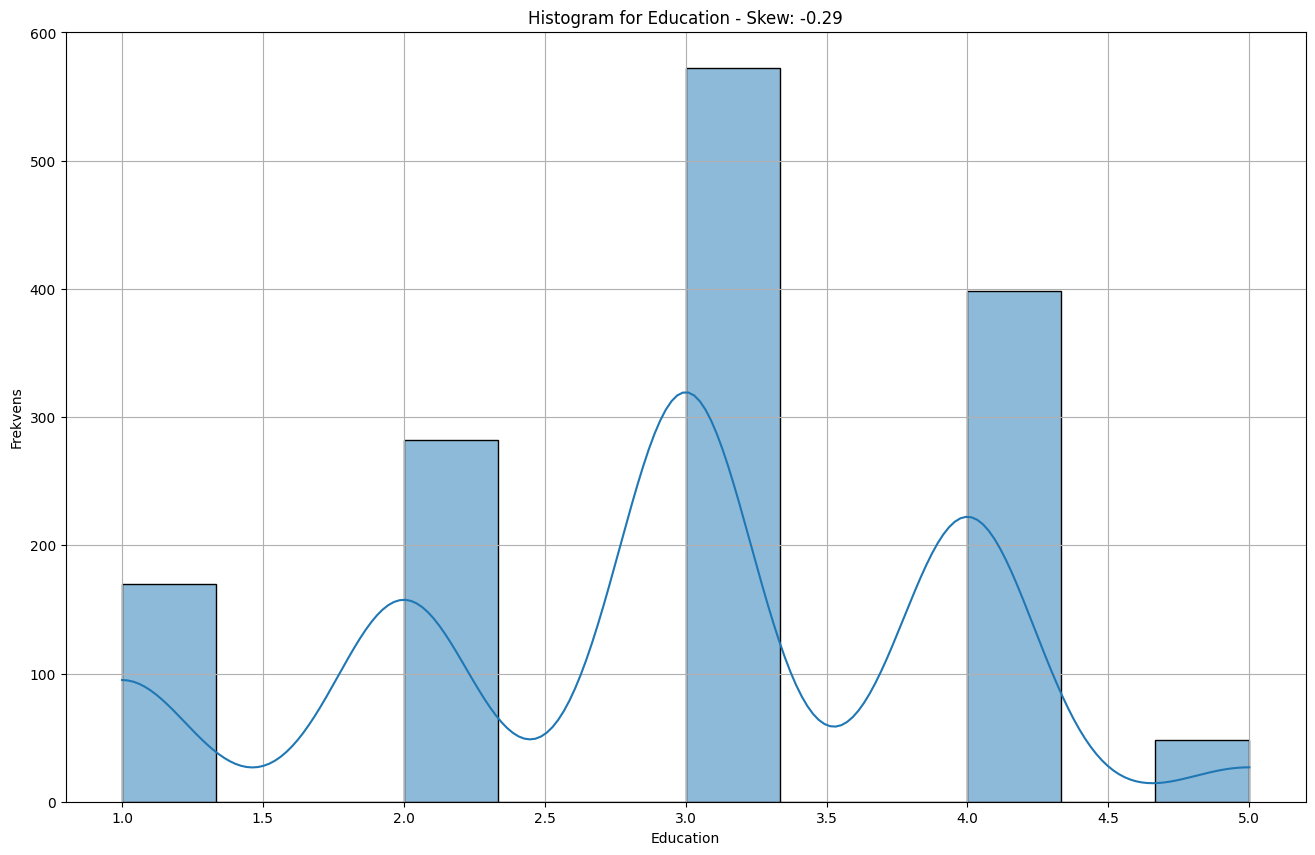

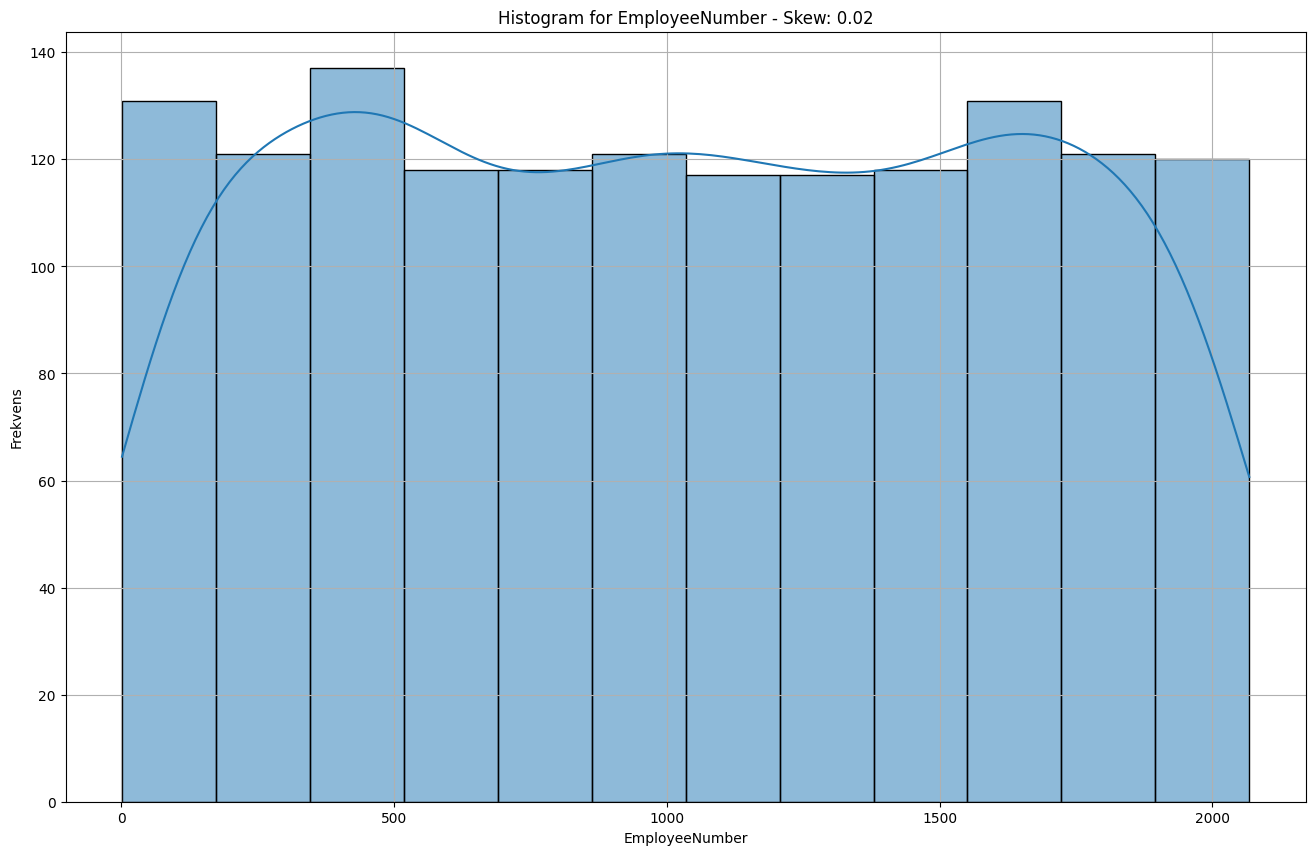

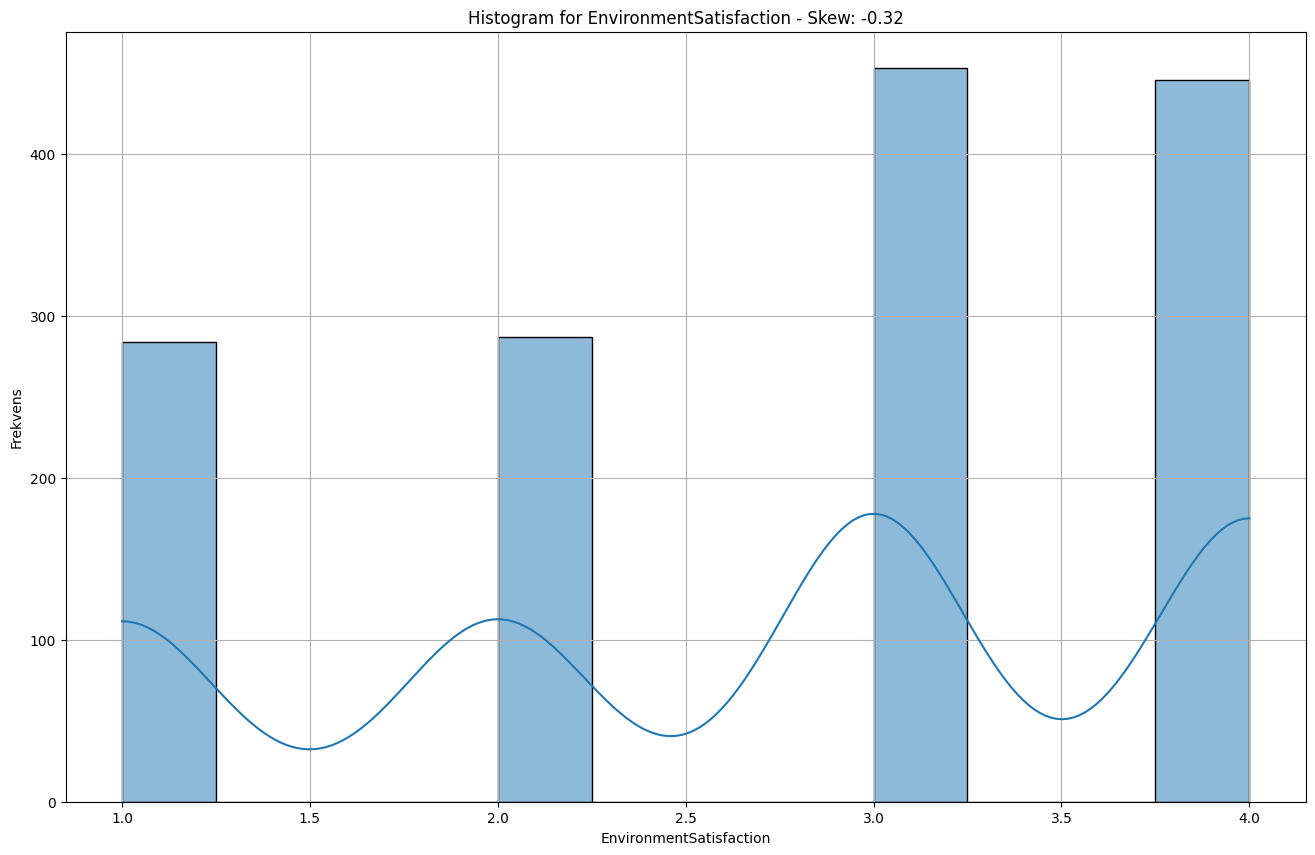

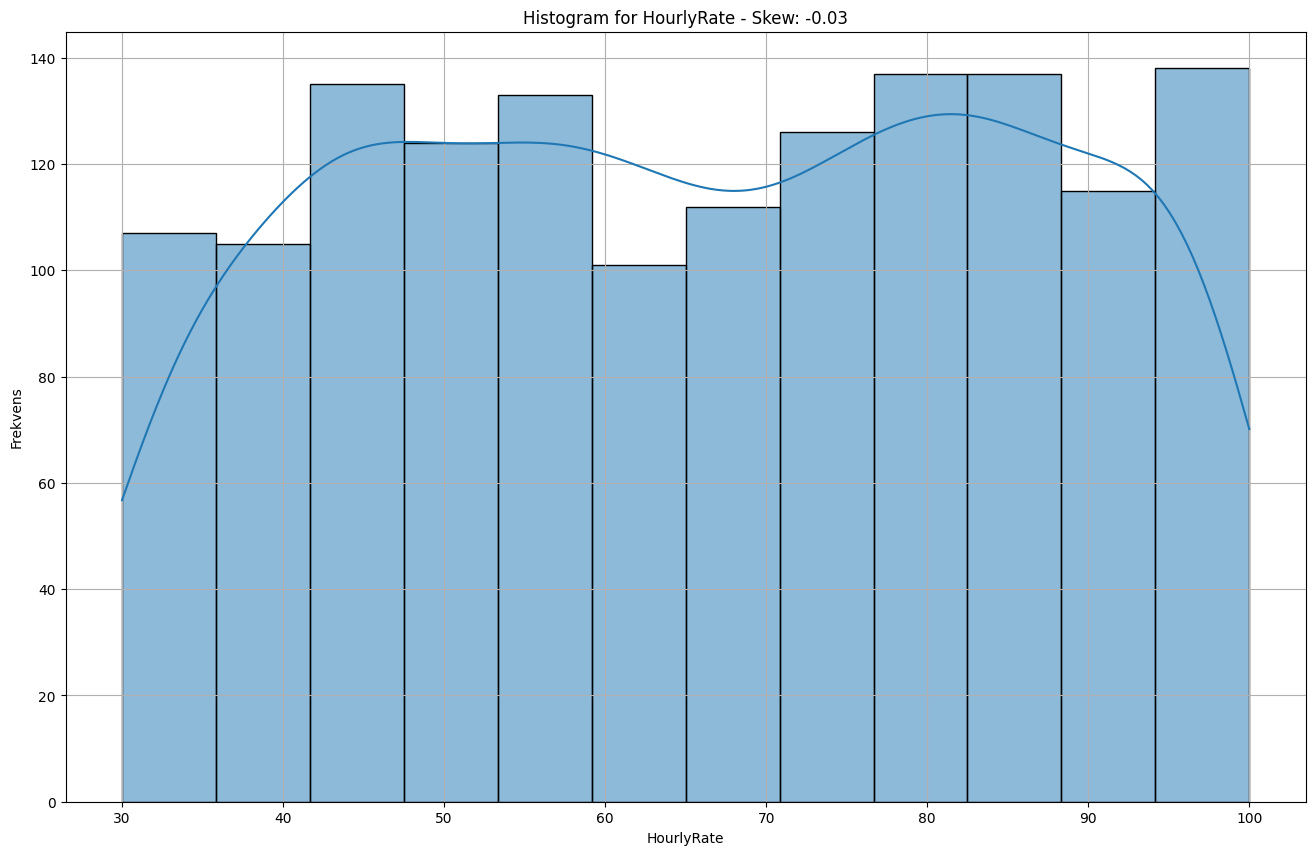

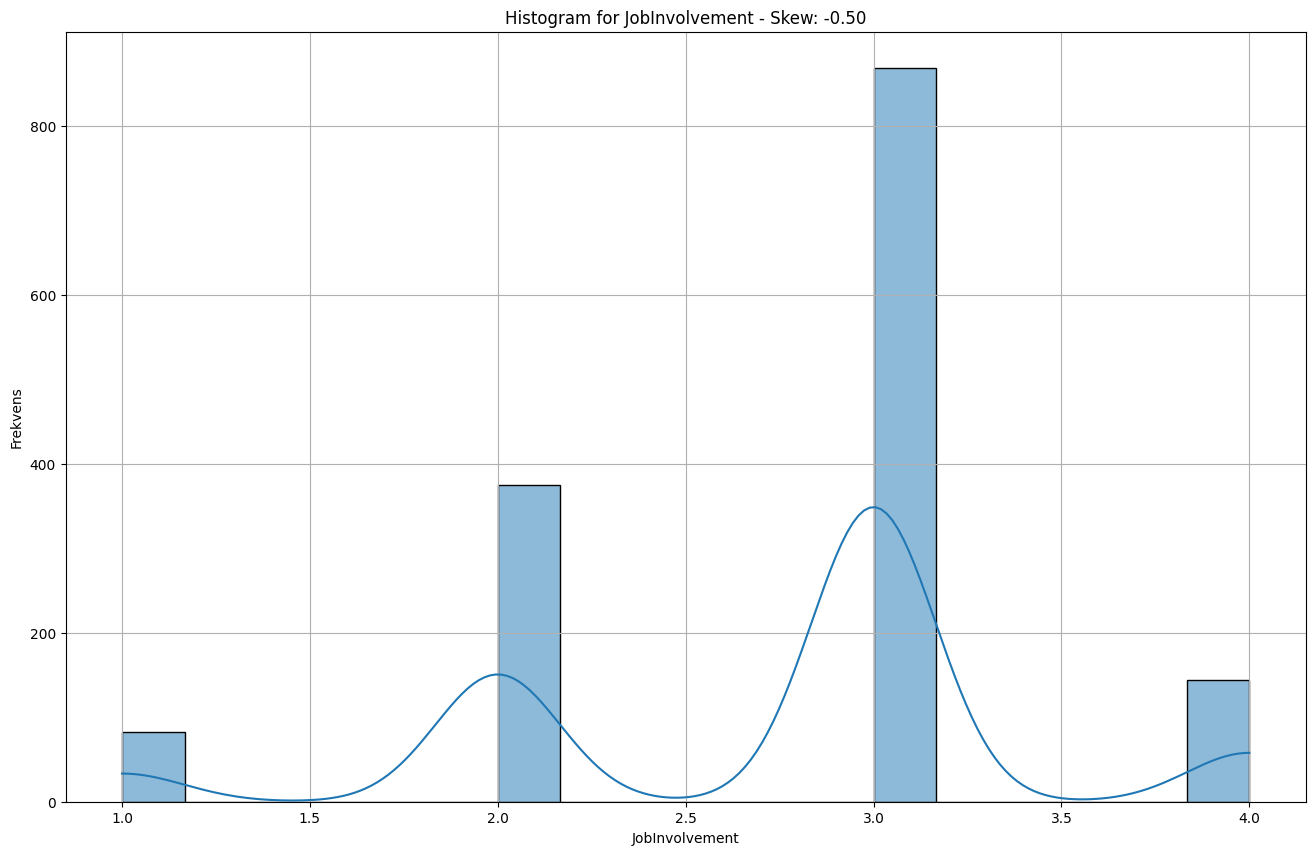

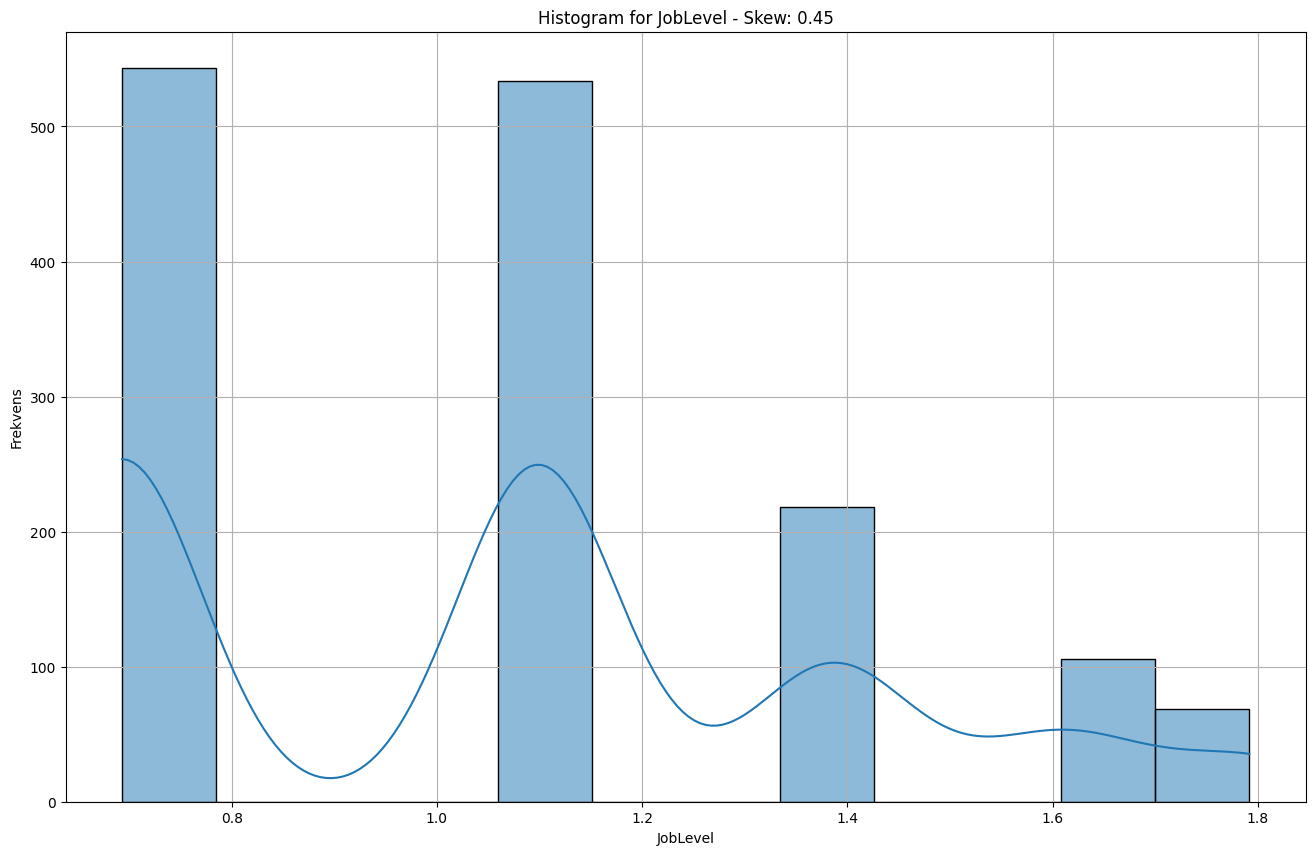

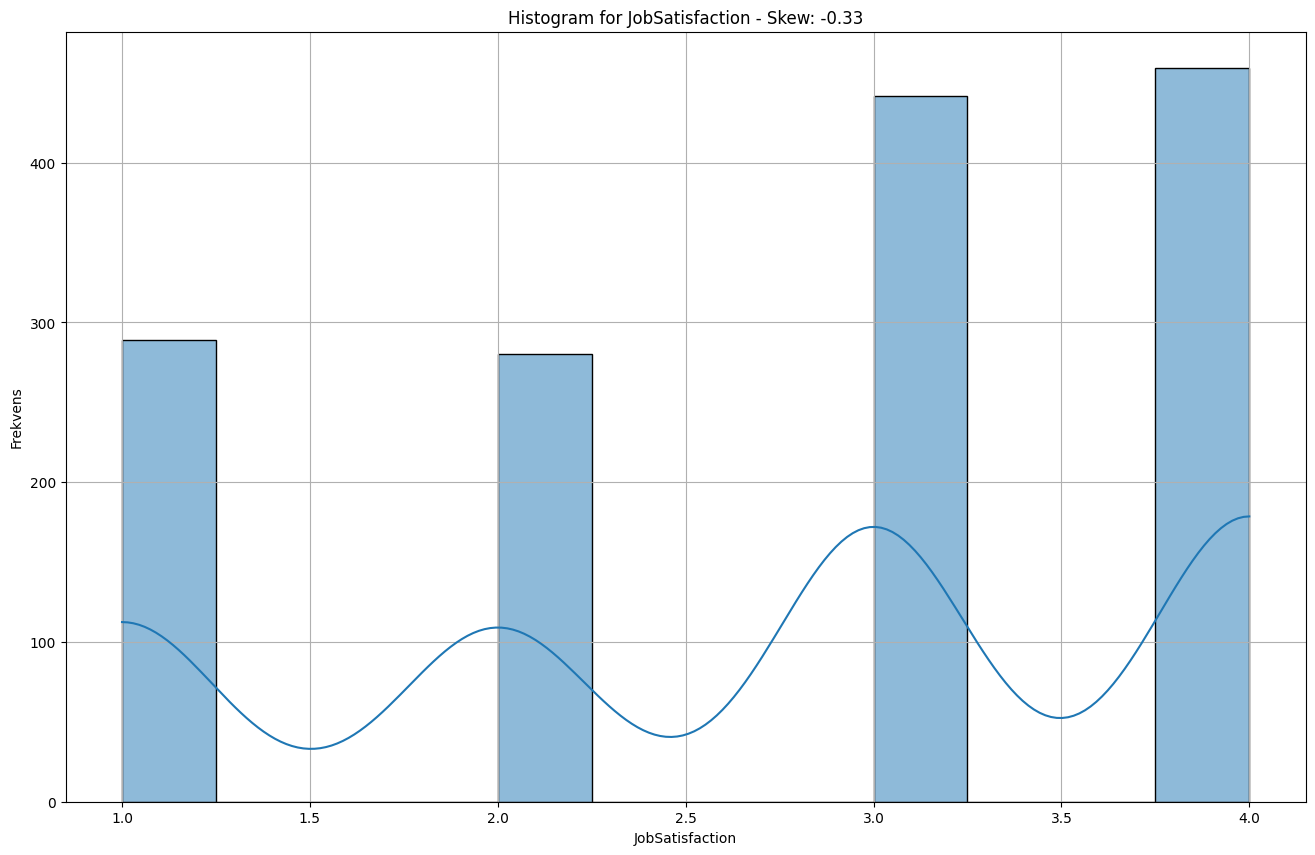

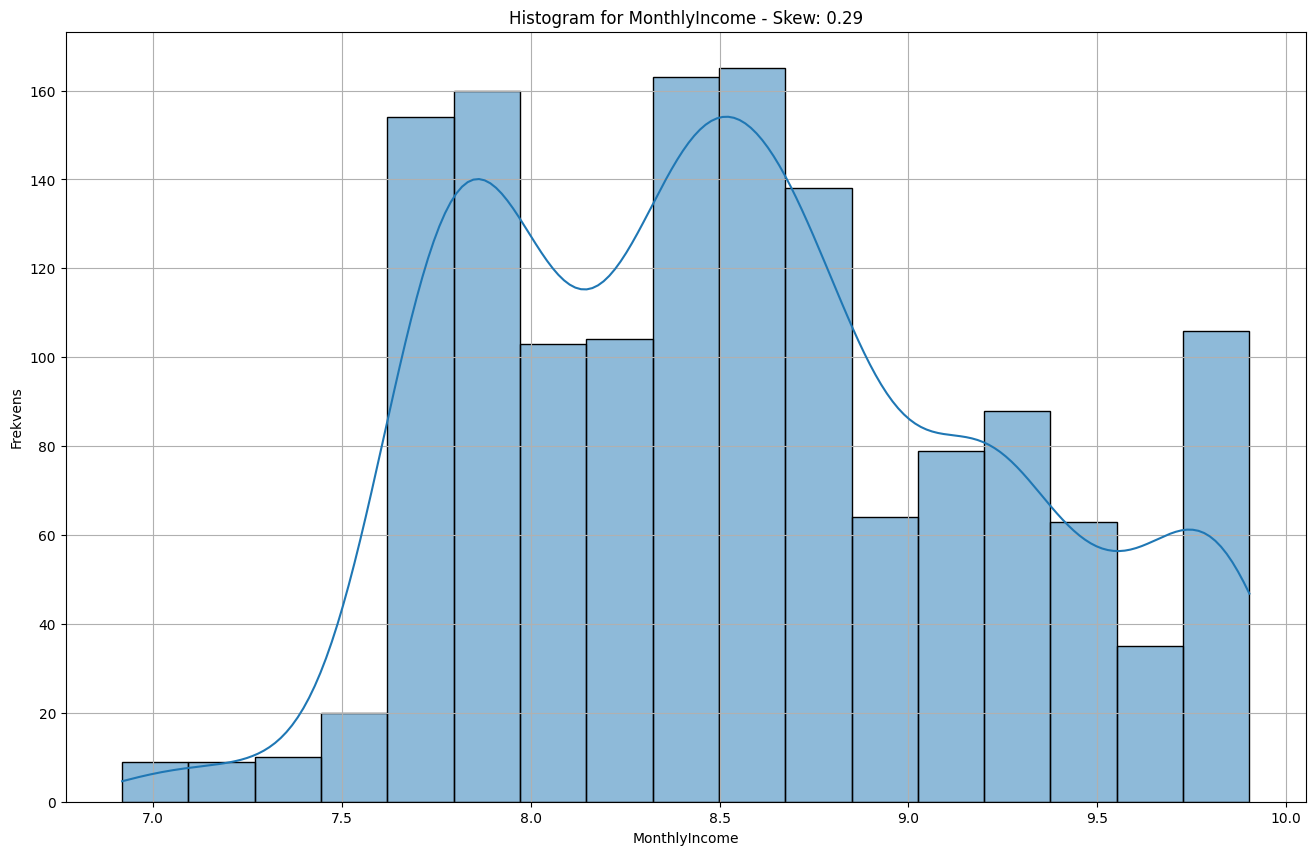

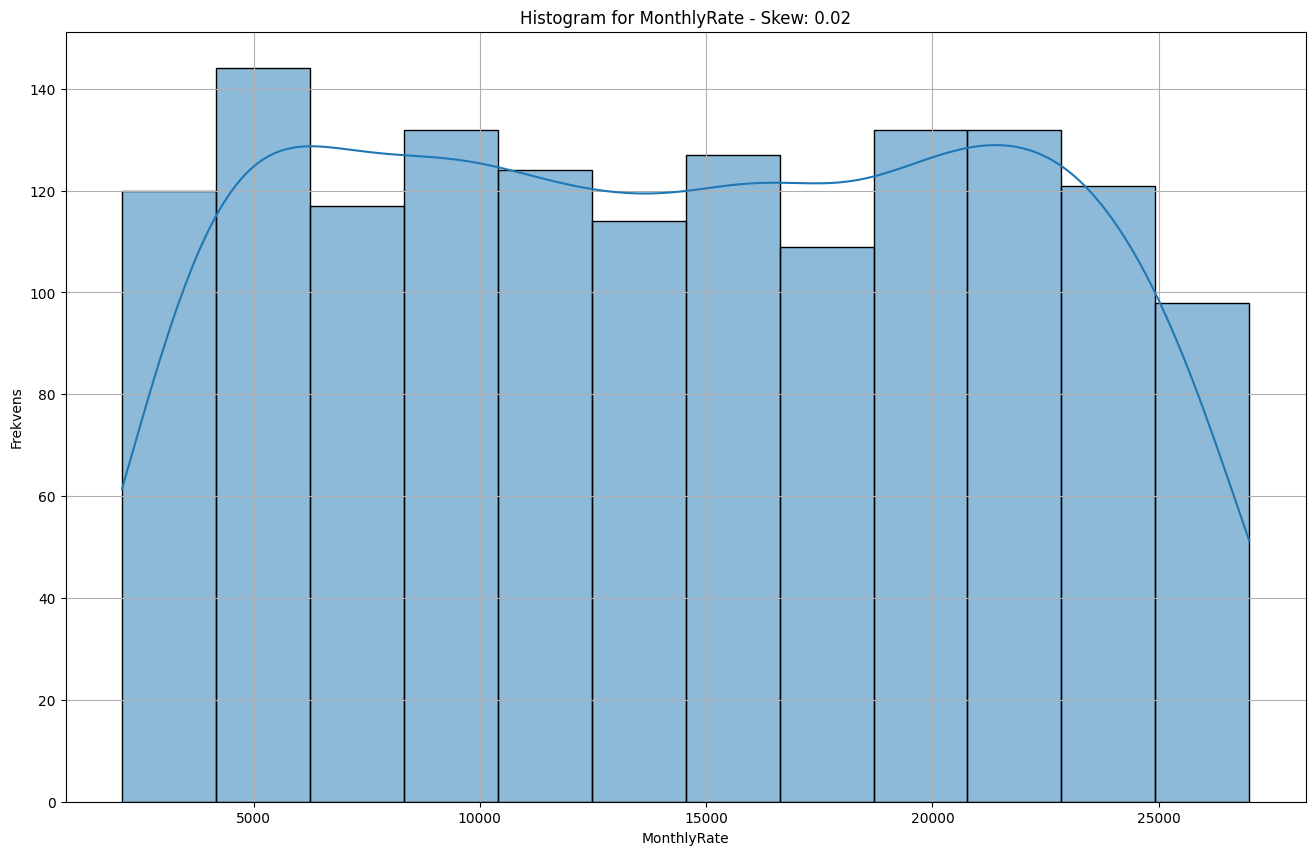

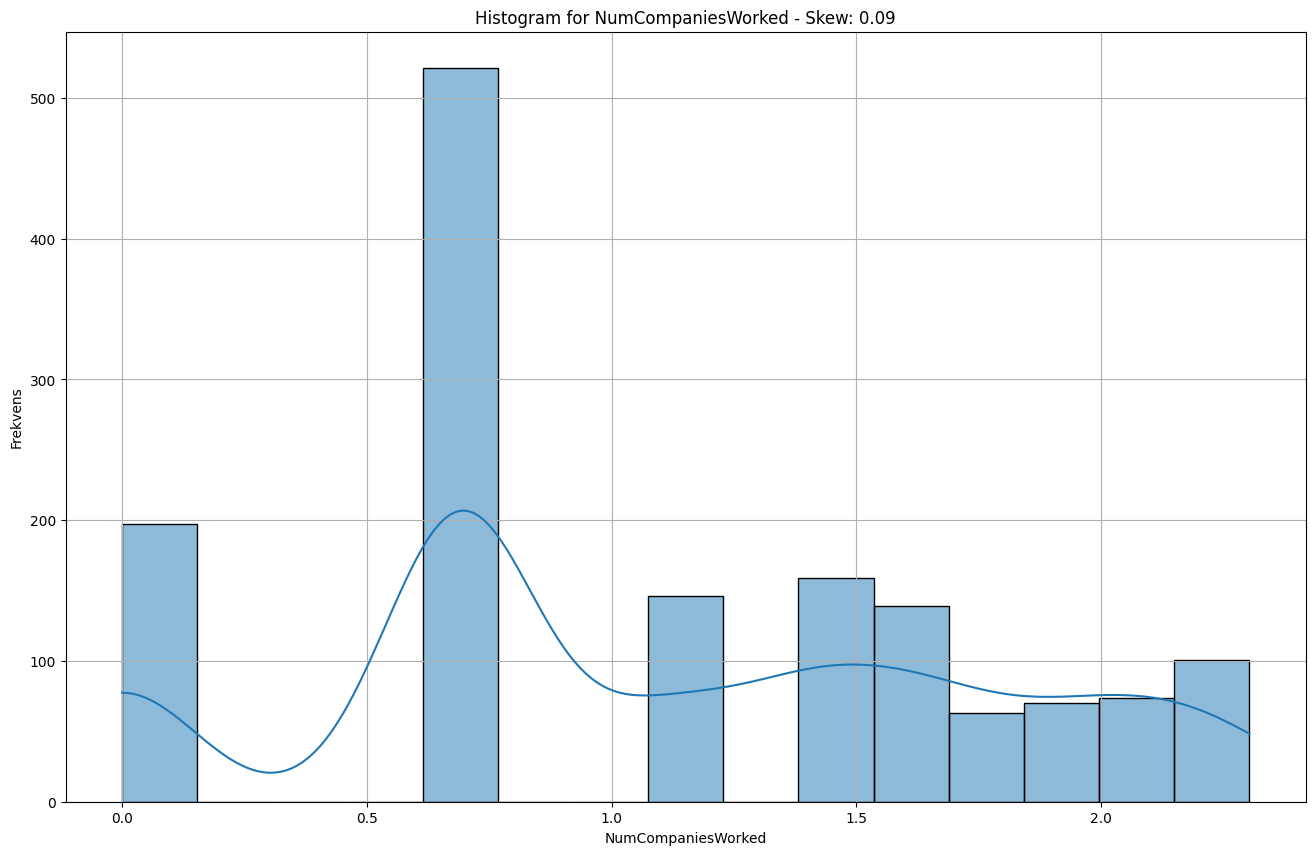

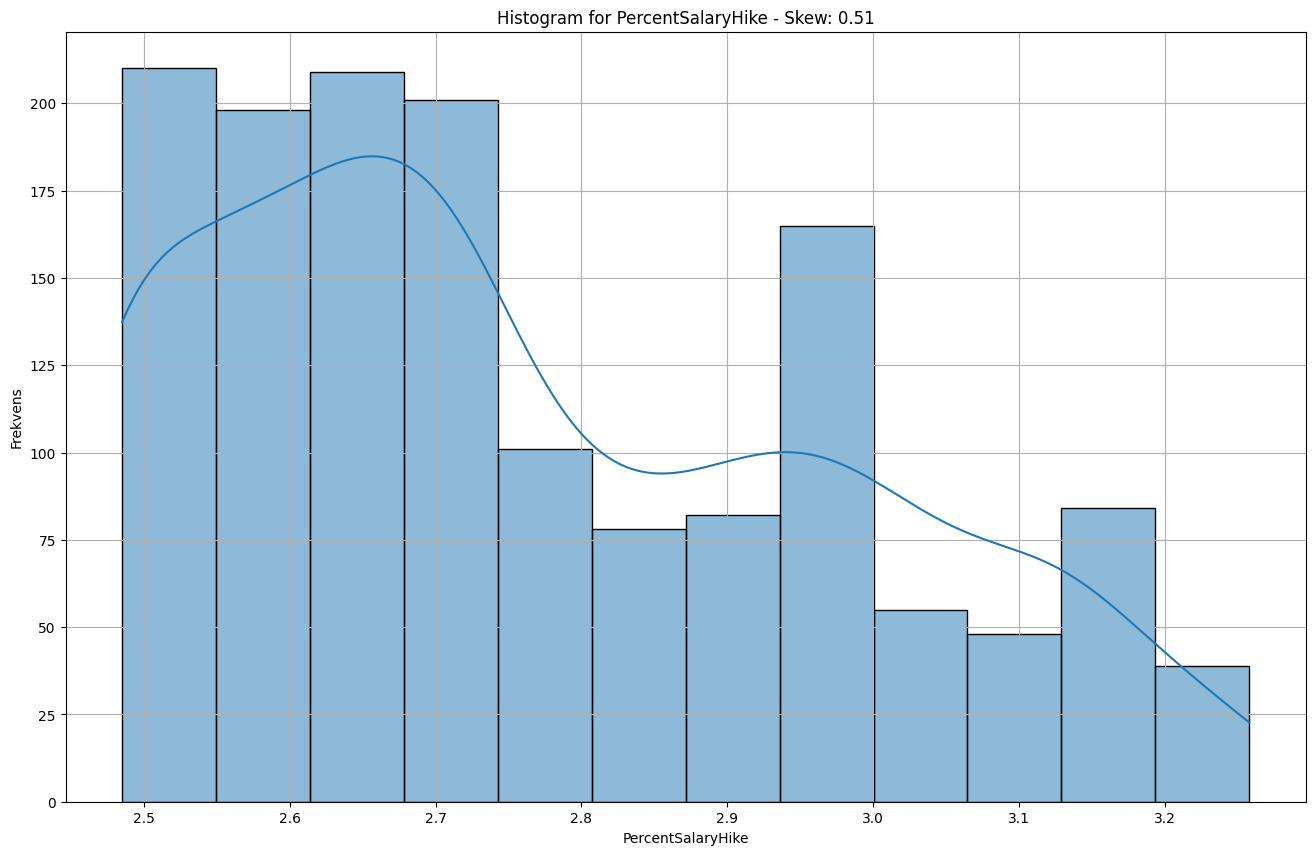

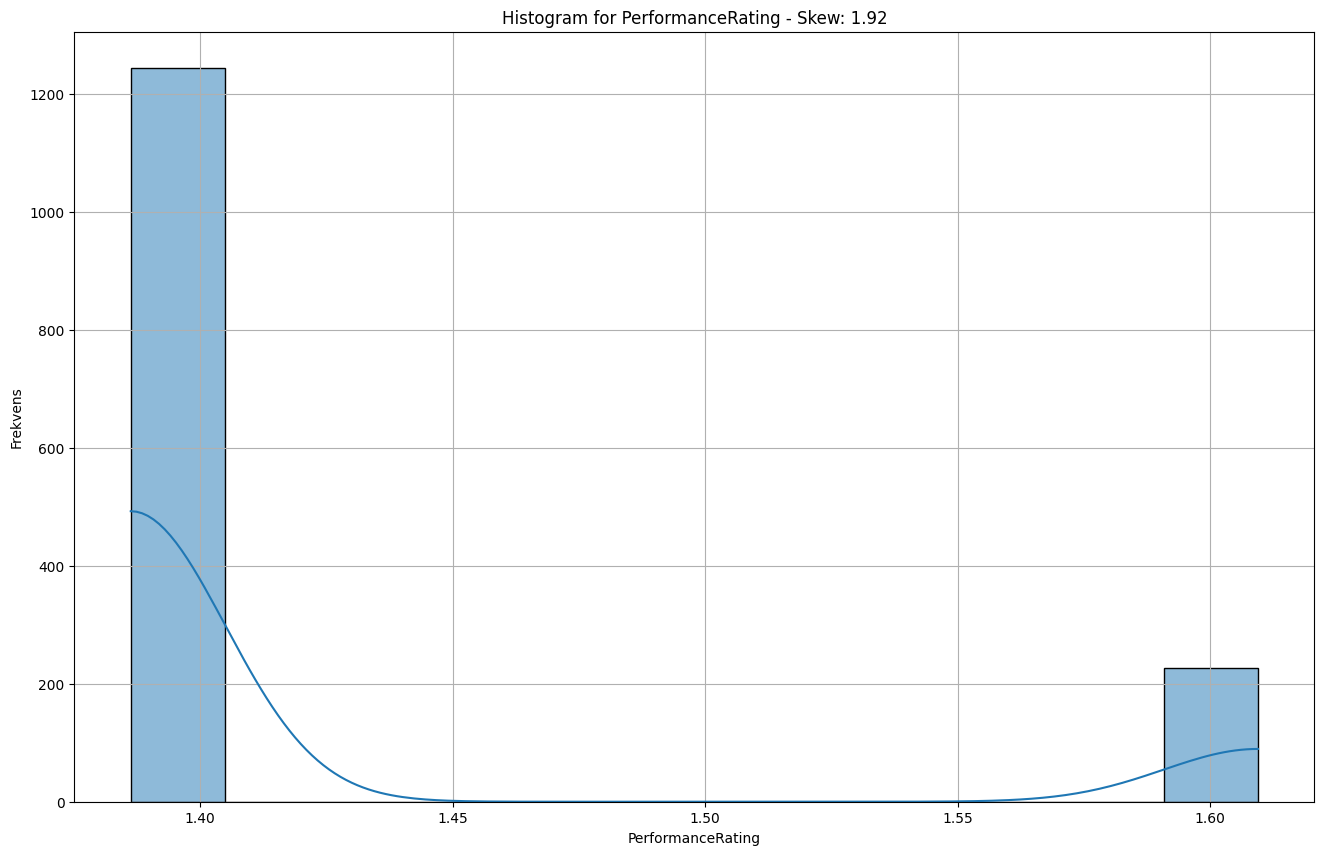

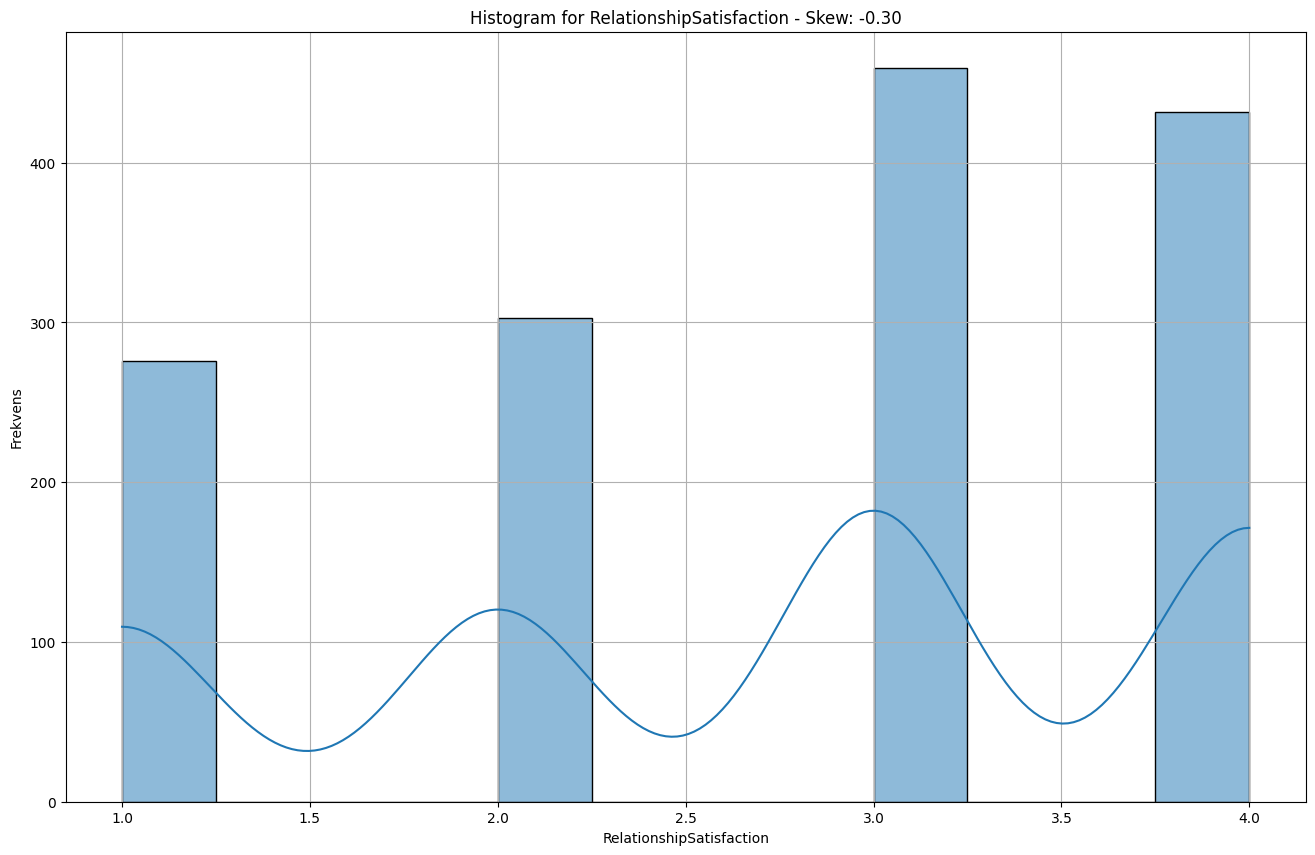

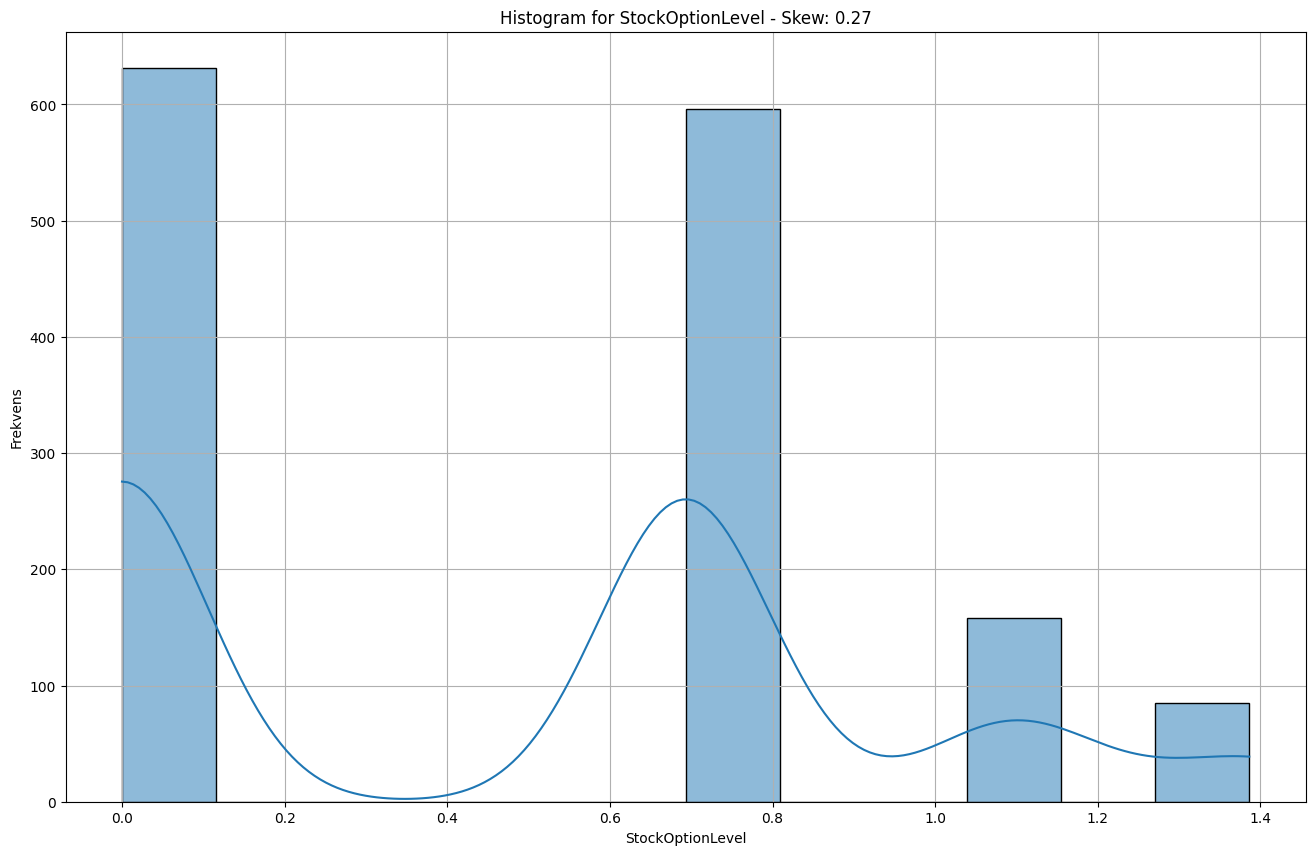

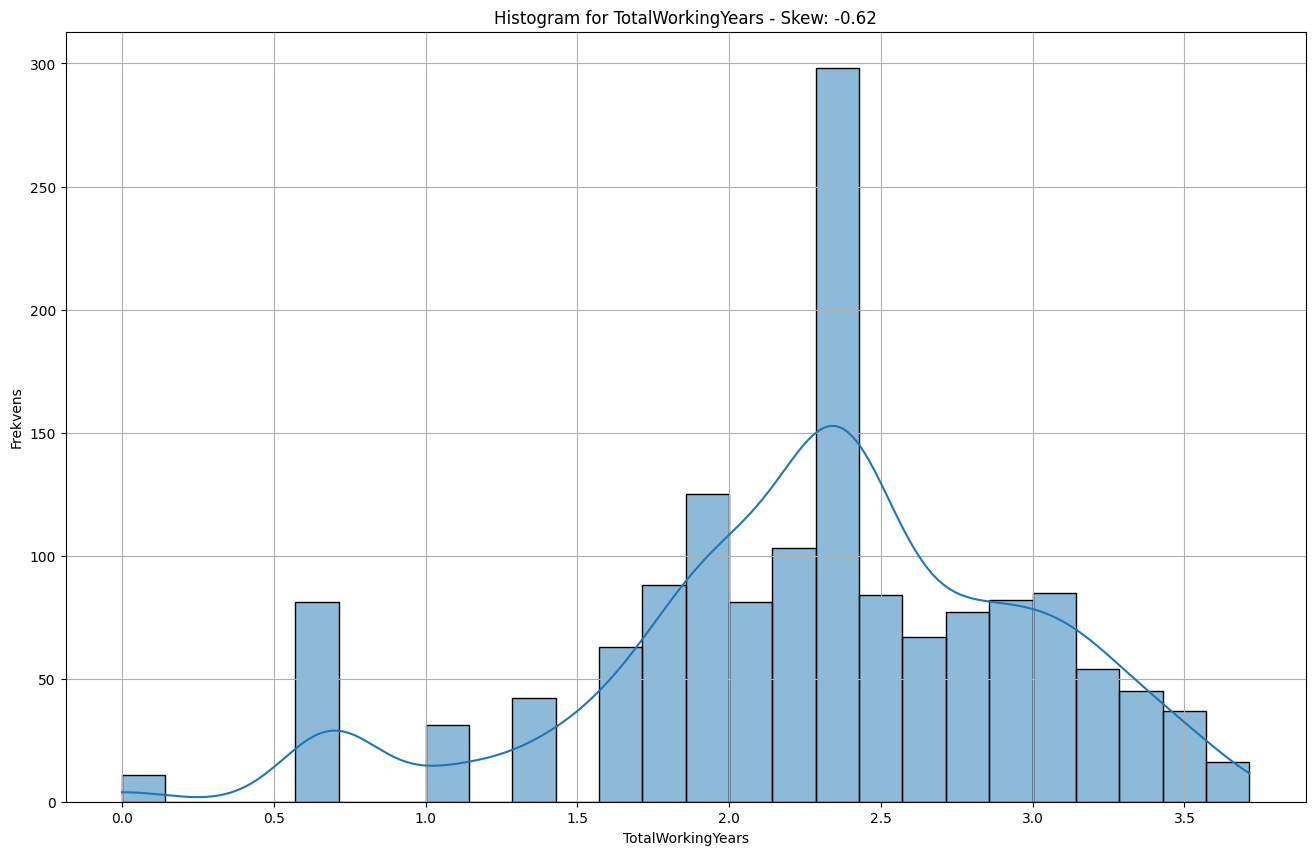

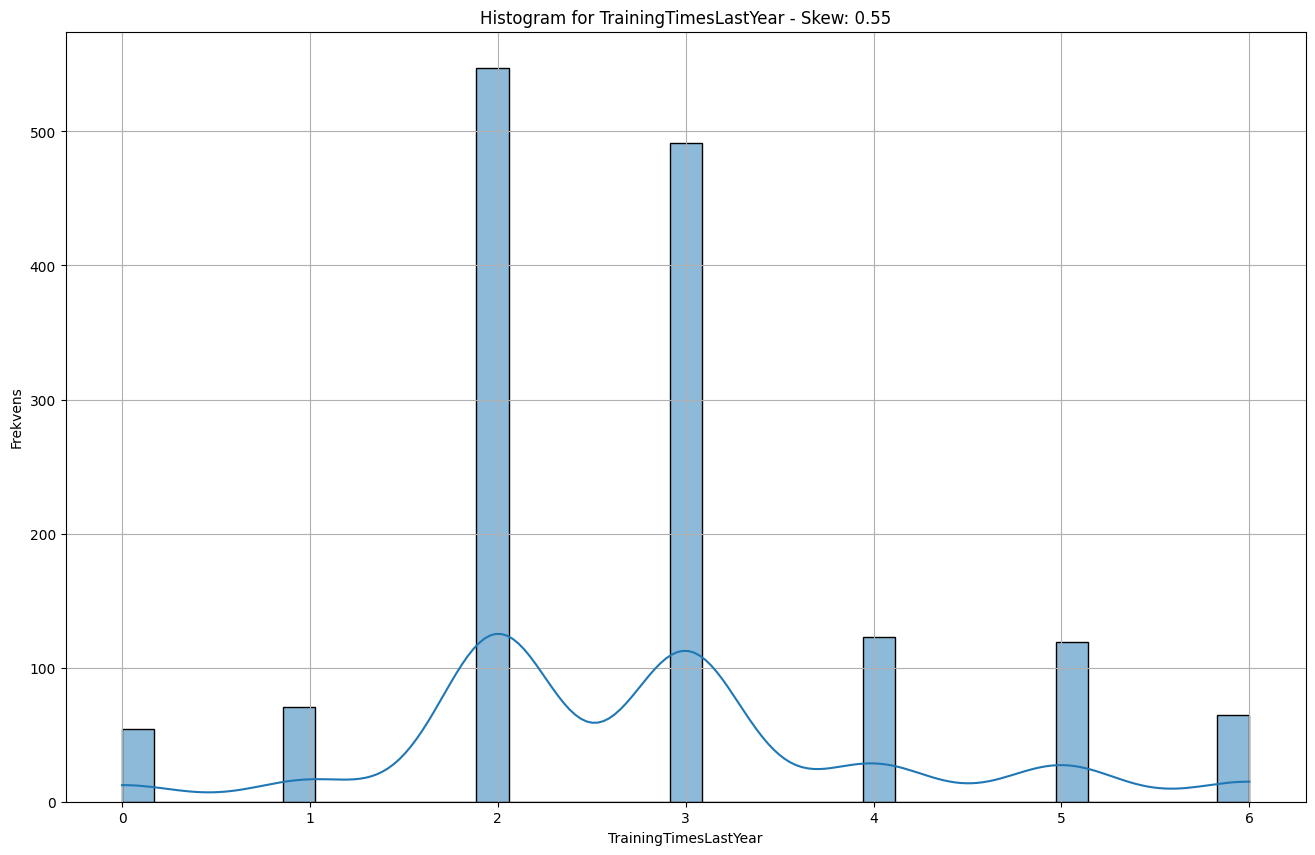

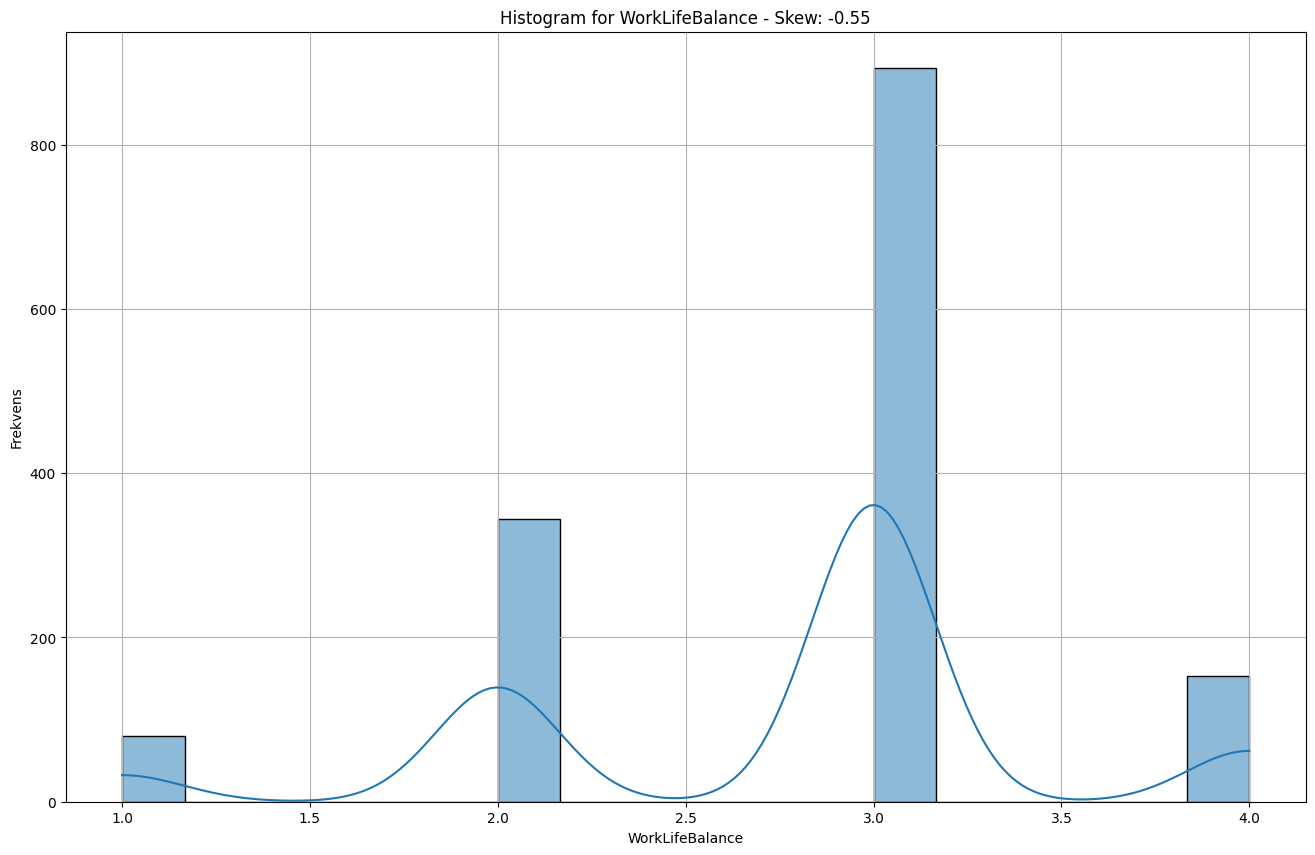

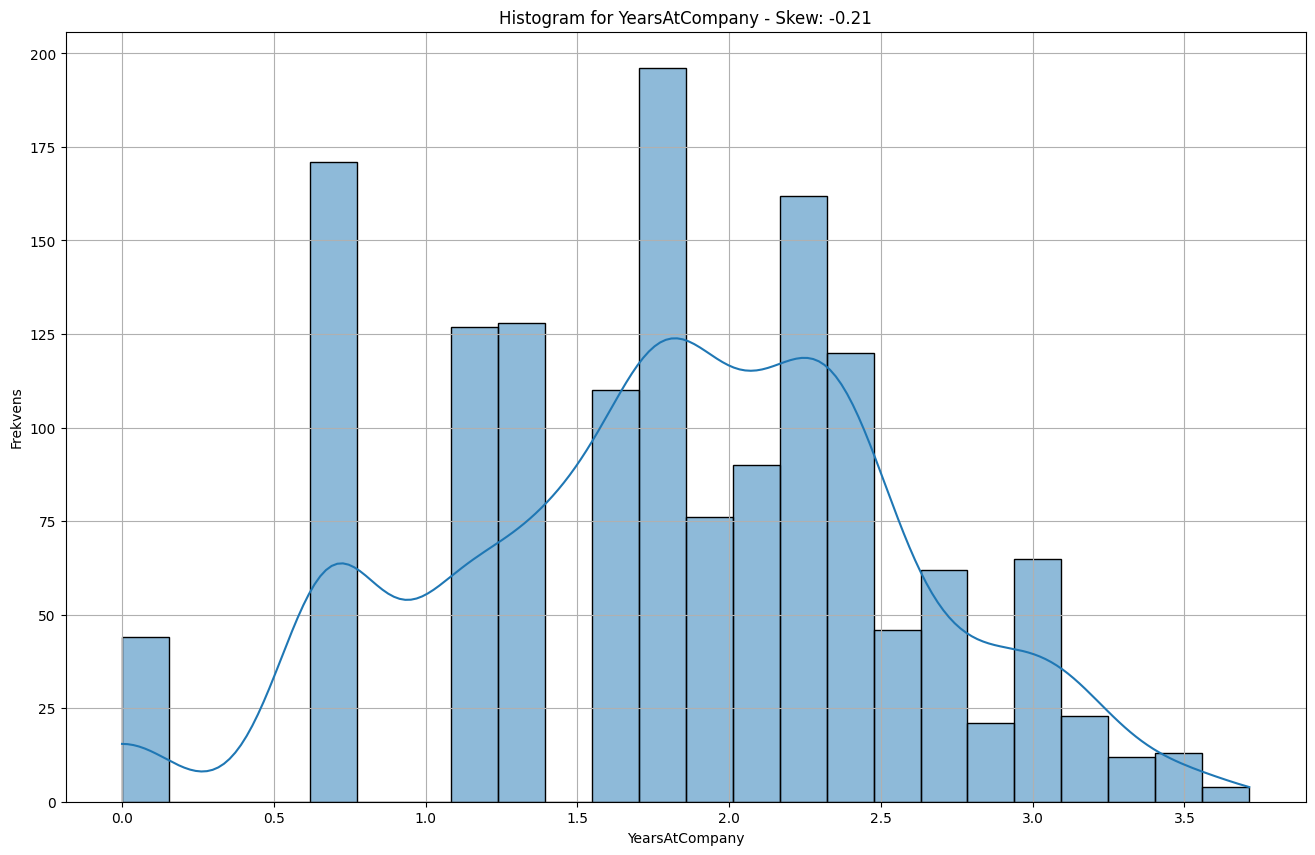

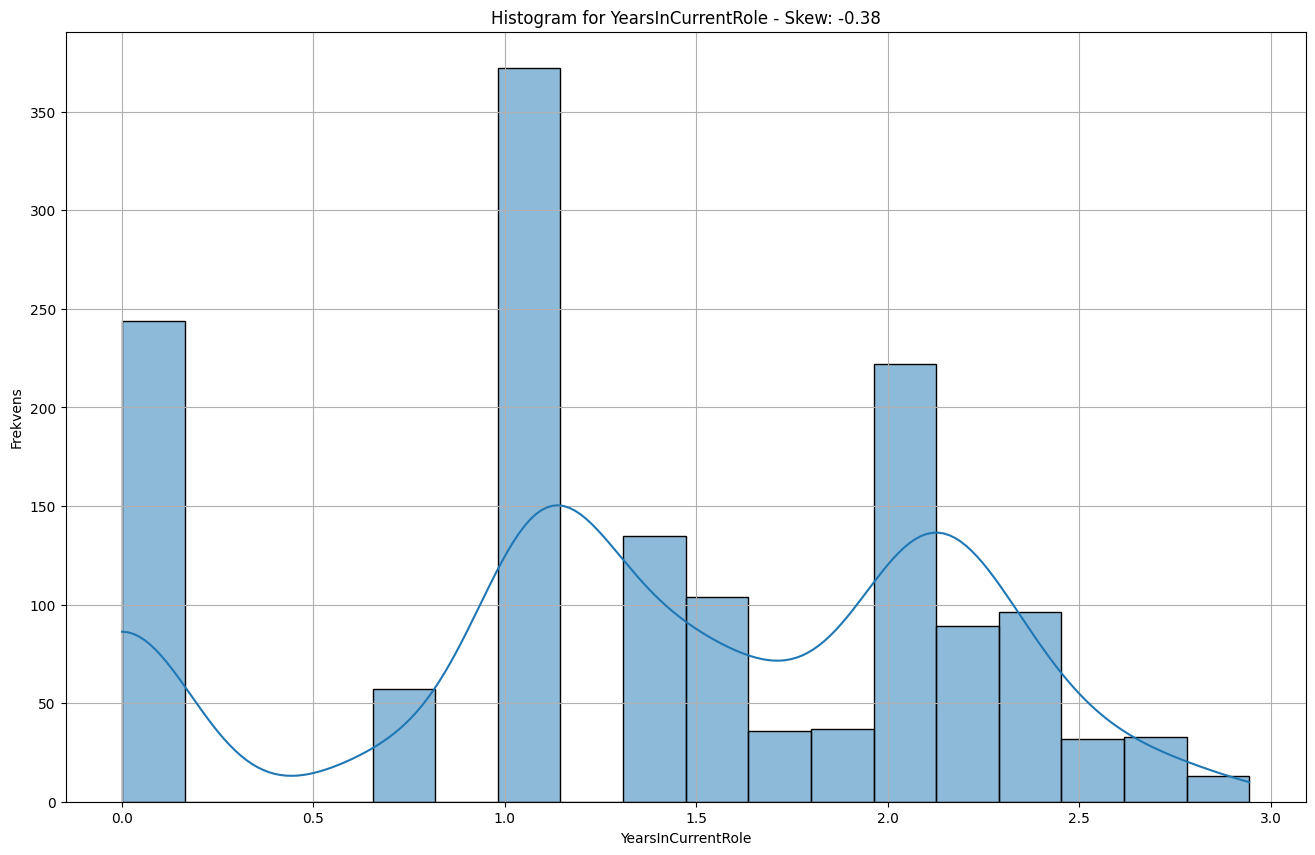

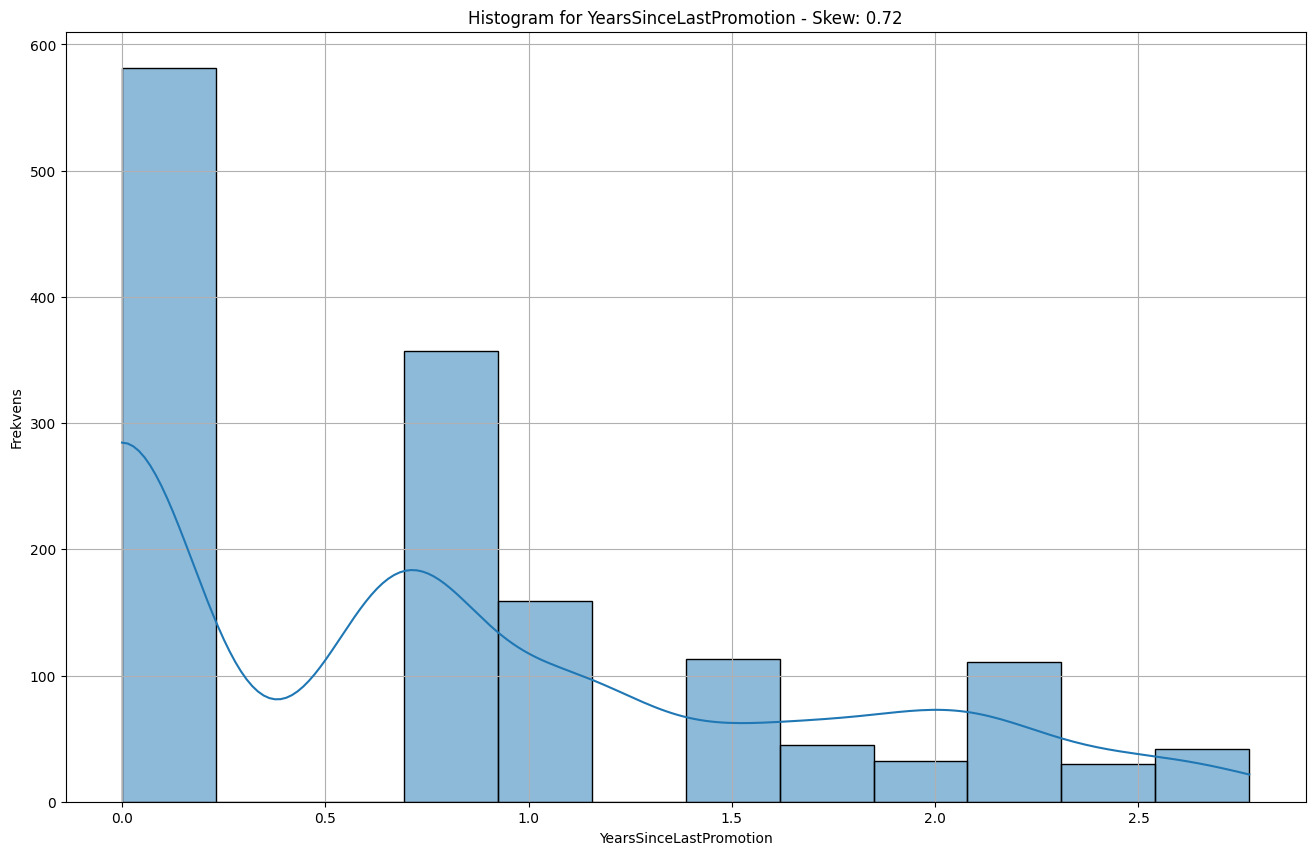

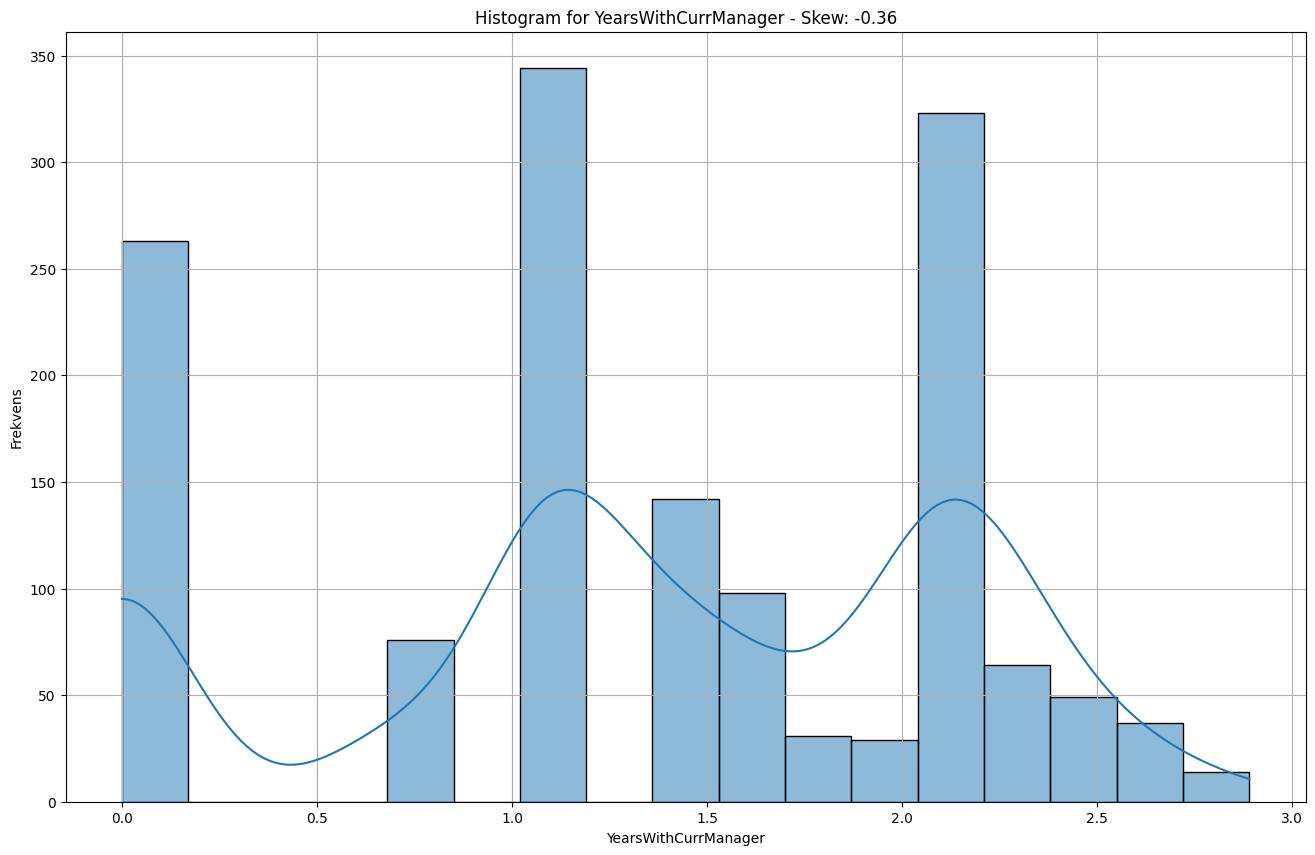

Age                         0.412864
DailyRate                  -0.003515
DistanceFromHome            0.957140
Education                  -0.289385
EmployeeNumber              0.016557
EnvironmentSatisfaction    -0.321326
HourlyRate                 -0.032278
JobInvolvement             -0.497911
JobLevel                    0.447676
JobSatisfaction            -0.329335
MonthlyIncome               0.286156
MonthlyRate                 0.018559
NumCompaniesWorked          0.092801
PercentSalaryHike           0.513018
PerformanceRating           1.919921
RelationshipSatisfaction   -0.302518
StockOptionLevel            0.271685
TotalWorkingYears          -0.621540
TrainingTimesLastYear       0.552560
WorkLifeBalance            -0.551916
YearsAtCompany             -0.207496
YearsInCurrentRole         -0.383106
YearsSinceLastPromotion     0.718071
YearsWithCurrManager       -0.357321
dtype: float64


In [20]:
# Plotter histogrammer for de numeriske kolonner
for col in numerical_data.columns:
    plt.figure(figsize=(16, 10))  
    sns.histplot(numerical_data[col], kde=True)  
    plt.title(f'Histogram for {col} - Skew: {skew_values_after[col]:.2f}')
    plt.xlabel(col)
    plt.ylabel('Frekvens')
    plt.grid(True)
    plt.show()

# Udskriver skævheden for hver numerisk kolonne
print(skew_values_after)

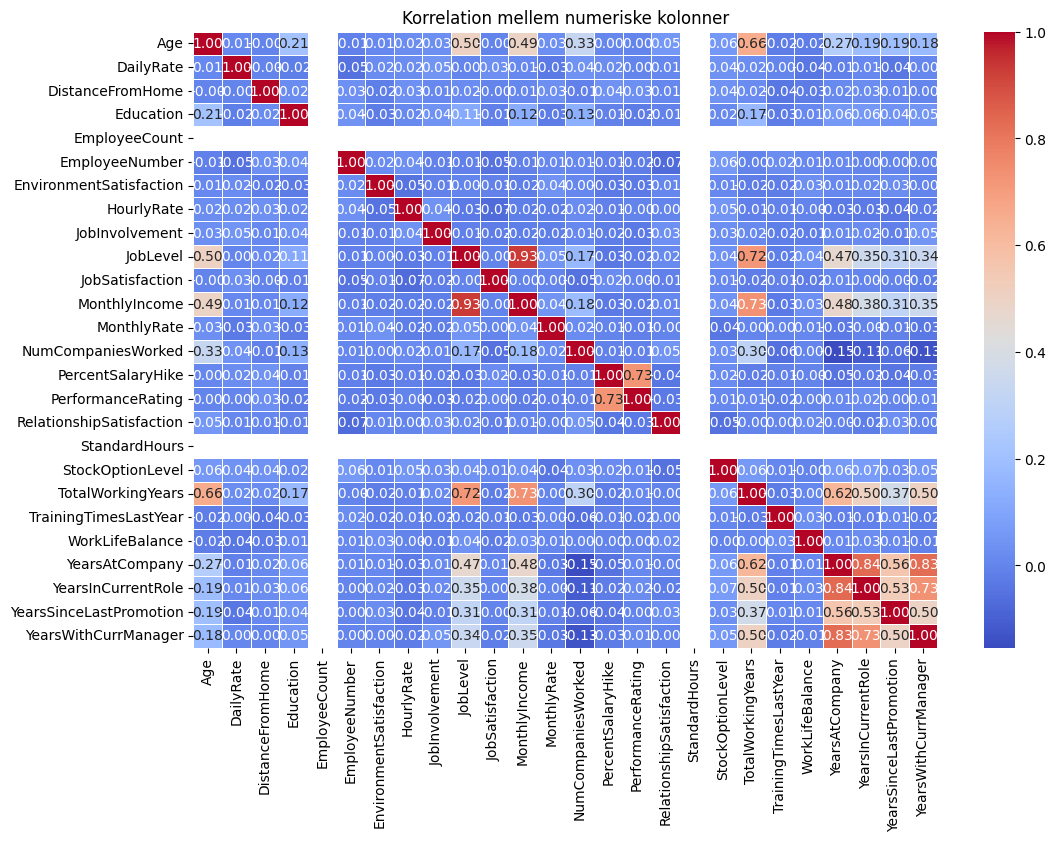

In [21]:
# Vælger de numeriske kolonner
numerical_data = data.select_dtypes(include=['float64', 'int64'])

# Beregner korrelationer for de numeriske kolonner
correlation_matrix = numerical_data.corr()

# Visualisering af korrelationsmatrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Korrelation mellem numeriske kolonner')
plt.show()

- **Stærk negativ korrelation:**  
  - *Age* og *DailyRate* (-1.00), hvilket indikerer, at ældre medarbejdere har lavere daglige satser.  
  - *Age* og *MonthlyIncome* (-0.50), som tyder på, at ældre medarbejdere generelt har lavere månedsløn.

- **Stærk positiv korrelation:**  
  - *TotalWorkingYears* og *YearsAtCompany* (0.78), da disse to funktioner ofte stiger sammen over tid.  
  - *YearsAtCompany* og *MonthlyIncome* (0.51), hvilket tyder på, at medarbejdere med længere ansættelse får højere løn.

- **Moderate korrelationer:**  
  - *MonthlyIncome* har positiv korrelation med både *YearsAtCompany* og *JobLevel*.  
  - *JobSatisfaction* og *YearsAtCompany* (-0.20), som kan indikere, at medarbejdere med længere anciennitet måske er mindre tilfredse med deres job.

- **Svag korrelation:**  
  - De fleste andre funktioner har svage korrelationer, hvilket betyder, at de ikke har en signifikant lineær sammenhæng med de andre variabler.

## Forberedelse af data

In [24]:
# Udvælgelse af relevante kolonner for regression og klassifikation
relevant_columns = [
    'Attrition',
    'Age', 'DistanceFromHome', 'MonthlyIncome', 'YearsAtCompany', 'JobRole',
    'Department', 'Gender', 'MaritalStatus', 'OverTime', 'Education', 'JobSatisfaction'
]

# Vælger de relevante kolonner fra datasættet
data_selected = data[relevant_columns]

# Forberedelse af kategoriske kolonner (One-Hot Encoding)
data_encoded = pd.get_dummies(data_selected, drop_first=True)

# Tjekker de første 5 rækker af den bearbejdede data
print(data_encoded.head())

   Age  DistanceFromHome  MonthlyIncome  YearsAtCompany  Education  \
0   41                 1       8.698514        1.945910          2   
1   49                 8       8.543056        2.397895          1   
2   37                 2       7.645398        0.000000          2   
3   33                 3       7.975908        2.197225          4   
4   27                 2       8.151622        1.098612          1   

   JobSatisfaction  Attrition_Yes  JobRole_Human Resources  \
0                4           True                    False   
1                2          False                    False   
2                3           True                    False   
3                3          False                    False   
4                2          False                    False   

   JobRole_Laboratory Technician  JobRole_Manager  \
0                          False            False   
1                          False            False   
2                           True            Fal

De relevante kolonner er valgt, og One-Hot Encoding er udført for de kategoriske kolonner som Gender, JobRole, OverTime osv.

## Skalering af data

In [27]:
# Skalering af numeriske funktioner
numerical_features = ['Age', 'DistanceFromHome', 'MonthlyIncome', 'YearsAtCompany']

scaler = StandardScaler()
data_encoded[numerical_features] = scaler.fit_transform(data_encoded[numerical_features])

# Tjekker den skalerede data
print(data_encoded.head())

        Age  DistanceFromHome  MonthlyIncome  YearsAtCompany  Education  \
0  0.446350         -1.010909       0.219493        0.177344          2   
1  1.322365         -0.147150      -0.014600        0.774724          1   
2  0.008343         -0.887515      -1.366318       -2.394527          2   
3 -0.429664         -0.764121      -0.868626        0.509502          4   
4 -1.086676         -0.887515      -0.604032       -0.942513          1   

   JobSatisfaction  Attrition_Yes  JobRole_Human Resources  \
0                4           True                    False   
1                2          False                    False   
2                3           True                    False   
3                3          False                    False   
4                2          False                    False   

   JobRole_Laboratory Technician  JobRole_Manager  \
0                          False            False   
1                          False            False   
2                

De numeriske kolonner bliver skaleret til at have et gennemsnit på 0 og en standardafvigelse på 1, hvilket er nødvendigt for at sikre, at alle funktioner bidrager lige til maskinlæringsmodellen.

## Opdeling af data

In [30]:
# Opdeling af data i funktioner (X) og målvariabel (y)
y = data_encoded['Attrition_Yes']  # Antager at kolonnen hedder 'Attrition_Yes'
X = data_encoded.drop('Attrition_Yes', axis=1)  # Dropper 'Attrition_Yes' fra funktionerne

# Opdeling af data i trænings- og testdatasæt
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Træningsdata form: {X_train.shape}")
print(f"Testdata form: {X_test.shape}")

Træningsdata form: (1176, 20)
Testdata form: (294, 20)


Dataen opdeles i trænings og testdatasæt med en teststørrelse på 20%. Træningsdatasættet er klar til at blive brugt til at træne modeller, mens testdatasættet kan bruges til at evaluere modellernes præstation.

## Clustering data

In [33]:
# Vælger relevante funktioner for clustering
clustering_features = ['Age', 'DistanceFromHome', 'MonthlyIncome', 'YearsAtCompany', 'JobSatisfaction']

# Udvælger de relevante data (lav en kopi eksplicit)
data_clustering = data[clustering_features].copy()

# Skalering af data da det er vigtigt for clustering
# Først ændrer vi datatype til float64 for de relevante kolonner
data_clustering[clustering_features] = data_clustering[clustering_features].astype('float64')

# Derefter skaleres dataene
data_clustering.loc[:, clustering_features] = scaler.fit_transform(data_clustering[clustering_features])

print(data_clustering.head())

        Age  DistanceFromHome  MonthlyIncome  YearsAtCompany  JobSatisfaction
0  0.446350         -1.010909       0.219493        0.177344         1.153254
1  1.322365         -0.147150      -0.014600        0.774724        -0.660853
2  0.008343         -0.887515      -1.366318       -2.394527         0.246200
3 -0.429664         -0.764121      -0.868626        0.509502         0.246200
4 -1.086676         -0.887515      -0.604032       -0.942513        -0.660853


De relevante funktioner for clustering er udvalgt, og dataene bliver skaleret for at sikre, at alle funktioner bidrager lige meget til clusteringalgoritmerne.